In [1]:
import pandas as pd
import numpy as np
import math
import random
import csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from time import time
import random

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("mitbih_train.csv", header = None, index_col = False)

<AxesSubplot:>

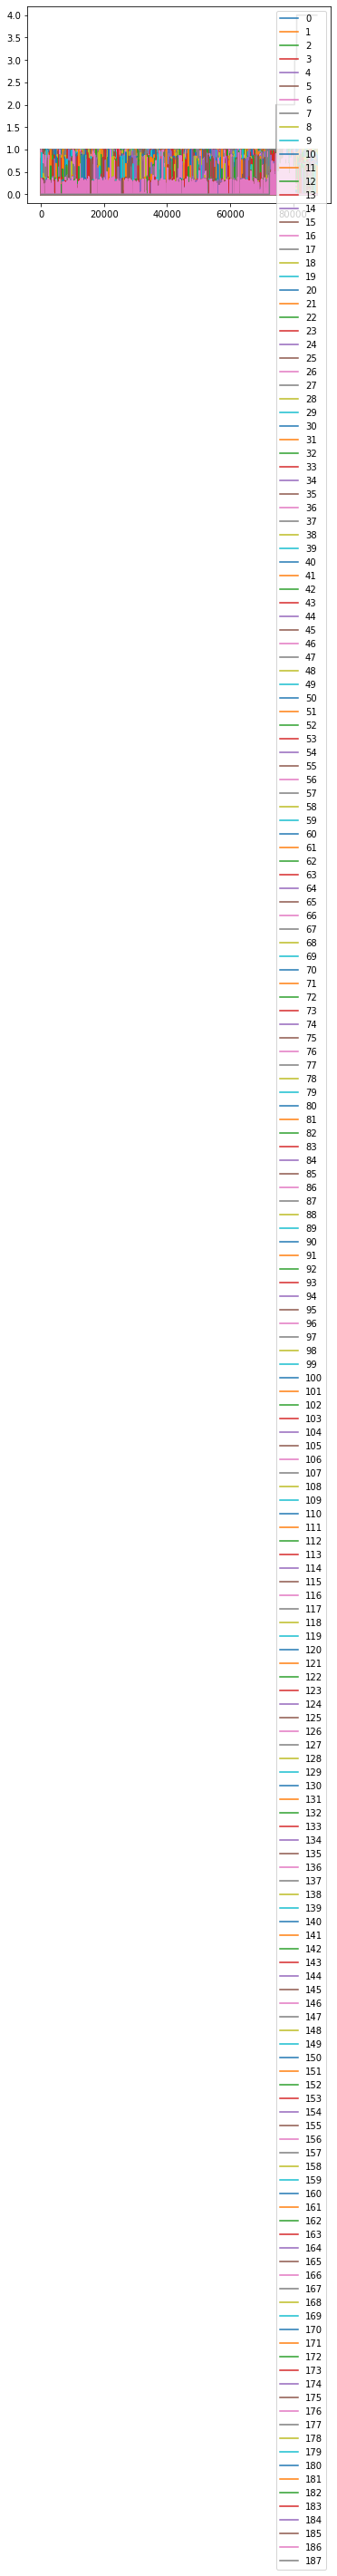

In [3]:
data.plot()

In [4]:
X = data.iloc[188:,1:]

In [5]:
X

,1,2,3,4,5,6,7,8,9,10,...,178,179,180,181,182,183,184,185,186,187
188,0.924000,0.428000,0.026000,0.034000,0.074000,0.074000,0.074000,0.070000,0.060000,0.058000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
189,0.325623,0.202847,0.174377,0.176157,0.147687,0.170819,0.172598,0.177936,0.169039,0.193950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
190,0.692308,0.092308,0.064615,0.101538,0.110769,0.113846,0.104615,0.104615,0.098462,0.098462,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
191,0.726667,0.086667,0.096667,0.113333,0.106667,0.120000,0.103333,0.116667,0.113333,0.110000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192,0.888430,0.692149,0.535124,0.303719,0.128099,0.026860,0.010331,0.014463,0.041322,0.082645,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,0.052632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,0.078333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,0.097959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,0.101266,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [6]:
Y = data.iloc[188:,0]

In [7]:
Y

188      0.916000
189      0.398576
190      0.941538
191      1.000000
192      0.940083
           ...   
87549    0.807018
87550    0.718333
87551    0.906122
87552    0.858228
87553    0.901506
Name: 0, Length: 87366, dtype: float64

In [8]:
#################### I N P U T ####################

#khi = 0.729
#c1 = 2.05
#c2 = 2.05


K = 0.3
c1 = 2.05
c2 = 2.05
c = c1 + c2
khi = 2*K/(abs(2-c-math.sqrt(c**2-4*c)))
n_iterations = 10
n_particles = 100

In [9]:
#mencari nilai 0-1 loss dari tiap partikel
#partikle = (gamma,C) untuk rbf
def fitness_function(position):
    kf = KFold(n_splits = 3)
    svclassifier = SVC(kernel='rbf', gamma = position[0], C = position[1] )  
    #svclassifier.fit(train_mit, out_train_mit)
    scores = cross_val_score(svclassifier, X, Y, cv = kf, scoring = 'roc_auc')
    """pred_svc_mit = classification_rbf.predict(valid_mit)
    report = classification_report(out_valid_mit, pred_svc_mit, target_names=[MIT_Outcome[i] for i in MIT_Outcome])"""
    return np.mean(scores)
   # y_train_pred = svclassifier.predict(X_train)
   # y_test_pred = svclassifier.predict(X_test)   
   # return (confusion_matrix(y_train,y_train_pred)[0][1] + confusion_matrix(y_train,y_train_pred)[1][0])/np.sum(confusion_matrix(y_train,y_train_pred)), (confusion_matrix(y_test,y_test_pred)[0][1] + confusion_matrix(y_test,y_test_pred)[1][0])/np.sum(confusion_matrix(y_test,y_test_pred))

#plotting (x axis = gamma, y axis = C)
def plot(position):
    x = []
    y = []
    for i in range(0,len(particle_position_vector)):
        x.append(particle_position_vector[i][0])
        y.append(particle_position_vector[i][1])
    colors = (0,0,0)
    plt.scatter(x, y, c = colors, alpha = 0.3)
    plt.xlabel('gamma')
    plt.ylabel('C')
    plt.axis([-1,11,-1,11])
    plt.gca().set_aspect('equal', adjustable='box')
    return plt.show()

for i in range(n_particles):
    max_velocity = np.array([10,10])
    min_velocity = np.array([-10,-10])
    max_position = np.array([10,10])
    min_position = np.array([0.0001, 0.001])

def eval_velocity(new_velocity):
    for j in range(0,2):
        if(new_velocity[j] > max_velocity[j]):
            new_velocity[j] = max_velocity[j]
        elif(new_velocity[j] < min_velocity[j]):
            new_velocity[j] = min_velocity[j]
    return new_velocity

def eval_position(particle_position_vector):
    for j in range(0,2):
        if(particle_position_vector[j] > max_position[j]):
            particle_position_vector[j] = max_position[j]
        elif(particle_position_vector[j] < min_position[j]):
            particle_position_vector[j] = min_position[j]
    return particle_position_vector
        

In [10]:
particle_position_vector = np.array([np.array([random.random()*10, random.random()*10]) for _ in range(n_particles)])
pbest_position = particle_position_vector
pbest_fitness_value = np.array([0 for _ in range(n_particles)])
gbest_fitness_value = np.array([0])
gbest_position = np.array([float('inf'), float('inf')])
velocity_vector = np.array([np.array([(-1) ** (bool(random.getrandbits(1)))*random.random()*2,(-1) ** (bool(random.getrandbits(1))) * random.random()*2]) for _ in range(n_particles)])
#velocity_vector = ([np.array([0, 0]) for _ in range(n_particles)])
iteration = 0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


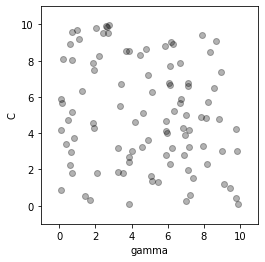

C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 1 is	 score:  93.88081131740327  At (gamma, c):  [5.97340297 4.0238989 ] .. Time =  0.3448905944824219


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 2 is	 score:  91.5678080764132  At (gamma, c):  [3.86900918 2.42966824] .. Time =  0.32962512969970703


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 3 is	 score:  91.56268697083324  At (gamma, c):  [3.83636239 0.08961363] .. Time =  0.3584280014038086


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 4 is	 score:  92.7311339877689  At (gamma, c):  [0.51879284 4.75544991] .. Time =  0.3561208248138428


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 5 is	 score:  92.31267173107284  At (gamma, c):  [1.25402898 6.31014118] .. Time =  0.32216644287109375


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 6 is	 score:  95.38479544331246  At (gamma, c):  [6.98283235 0.28179076] .. Time =  0.34957313537597656


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 7 is	 score:  92.58779127083396  At (gamma, c):  [6.68908479 7.89131374] .. Time =  0.3281223773956299


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 8 is	 score:  95.03385741553087  At (gamma, c):  [6.66191155 5.642741  ] .. Time =  0.37403345108032227


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 9 is	 score:  92.02000725266454  At (gamma, c):  [5.84024571 8.82296679] .. Time =  0.34488511085510254


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 10 is	 score:  93.44323989218316  At (gamma, c):  [0.10319419 5.87092115] .. Time =  0.4024674892425537


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 11 is	 score:  91.51409897642728  At (gamma, c):  [1.90314231 4.28940886] .. Time =  0.3885037899017334


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 12 is	 score:  93.76732442093584  At (gamma, c):  [3.87982273 2.69603359] .. Time =  0.38745903968811035


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 13 is	 score:  92.16076610604091  At (gamma, c):  [9.84471787 2.99599953] .. Time =  0.3610363006591797


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 14 is	 score:  93.9921696532046  At (gamma, c):  [6.18074434 9.03920208] .. Time =  0.3566102981567383


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 15 is	 score:  90.85688182360215  At (gamma, c):  [4.91725616 3.6391886 ] .. Time =  0.3341062068939209


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 16 is	 score:  92.97359041402343  At (gamma, c):  [4.21101021 4.60047269] .. Time =  0.336101770401001


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 17 is	 score:  92.7832480635605  At (gamma, c):  [9.09992304 1.22009202] .. Time =  0.36172962188720703


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 18 is	 score:  92.38135051809394  At (gamma, c):  [5.89112613 4.1363176 ] .. Time =  0.3450801372528076


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 19 is	 score:  94.7529923999346  At (gamma, c):  [2.20495046 8.27896367] .. Time =  0.3565242290496826


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 20 is	 score:  92.81845782266443  At (gamma, c):  [1.07825239 9.19388515] .. Time =  0.37198758125305176


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 21 is	 score:  91.3783793901412  At (gamma, c):  [0.60937107 2.24361501] .. Time =  0.36913371086120605


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 22 is	 score:  93.89640365002943  At (gamma, c):  [3.33790775 5.51769601] .. Time =  0.39294910430908203


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 23 is	 score:  93.27421773645001  At (gamma, c):  [2.60034899 9.89221426] .. Time =  0.3311138153076172


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 24 is	 score:  91.84115699834956  At (gamma, c):  [8.83496869 4.78536544] .. Time =  0.32114219665527344


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 25 is	 score:  94.34250894395007  At (gamma, c):  [5.13105021 6.26123342] .. Time =  0.3187556266784668


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 26 is	 score:  93.62126116217706  At (gamma, c):  [5.46747257 1.33344044] .. Time =  0.33059048652648926


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 27 is	 score:  91.36136510822979  At (gamma, c):  [6.75132153 5.90020694] .. Time =  0.3218190670013428


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 28 is	 score:  94.75674482134227  At (gamma, c):  [6.92872424 3.91827819] .. Time =  0.3231351375579834


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 29 is	 score:  93.91172272686421  At (gamma, c):  [7.00258634 5.02988008] .. Time =  0.3206510543823242


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 30 is	 score:  92.02628212525163  At (gamma, c):  [0.70528526 8.0471926 ] .. Time =  0.315157413482666


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 31 is	 score:  94.45355076965681  At (gamma, c):  [7.1321007  6.60390188] .. Time =  0.318187952041626


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 32 is	 score:  91.98714184777815  At (gamma, c):  [8.55063927 6.50877392] .. Time =  0.31914329528808594


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 33 is	 score:  93.4554533035312  At (gamma, c):  [0.68084018 2.97254044] .. Time =  0.32808780670166016


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 34 is	 score:  93.90505378693962  At (gamma, c):  [8.99082588 3.03659731] .. Time =  0.3121654987335205


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 35 is	 score:  91.29098725658659  At (gamma, c):  [8.95982831 7.37791809] .. Time =  0.3146655559539795


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 36 is	 score:  91.29628115663063  At (gamma, c):  [0.96965534 9.6793184 ] .. Time =  0.3146648406982422


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 37 is	 score:  92.06819603653754  At (gamma, c):  [1.88473273 4.54415354] .. Time =  0.3117053508758545


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 38 is	 score:  93.30888928966417  At (gamma, c):  [1.88463235 7.89171107] .. Time =  0.31415891647338867


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 39 is	 score:  92.21756876663675  At (gamma, c):  [4.65889938 5.09823636] .. Time =  0.3171219825744629


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 40 is	 score:  93.82026890266914  At (gamma, c):  [4.91834507 7.20748344] .. Time =  0.3126716613769531


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 41 is	 score:  93.46985281584388  At (gamma, c):  [8.13538218 4.84173313] .. Time =  0.31615447998046875


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 42 is	 score:  95.34316971543835  At (gamma, c):  [3.68268659 8.54971122] .. Time =  0.31667470932006836


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 43 is	 score:  91.09744601062435  At (gamma, c):  [1.9374582  7.49725077] .. Time =  0.31417393684387207


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 44 is	 score:  93.07023906911462  At (gamma, c):  [5.12326067 1.38411456] .. Time =  0.31116819381713867


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 45 is	 score:  93.20413656835026  At (gamma, c):  [9.79042851 0.40743472] .. Time =  0.3112015724182129


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 46 is	 score:  95.07723266217711  At (gamma, c):  [5.89293516 2.81291845] .. Time =  0.3201918601989746


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 47 is	 score:  90.7618969650044  At (gamma, c):  [0.69504206 9.58999857] .. Time =  0.30977463722229004


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 48 is	 score:  94.68307808838632  At (gamma, c):  [3.2676923  3.20653513] .. Time =  0.32783079147338867


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 49 is	 score:  94.69056700203838  At (gamma, c):  [7.91084034 9.42841865] .. Time =  0.31620359420776367


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 50 is	 score:  90.99598862457141  At (gamma, c):  [0.81759727 3.72528049] .. Time =  0.310945987701416


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 51 is	 score:  93.80459083143079  At (gamma, c):  [4.01962225 3.01610446] .. Time =  0.3126718997955322


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 52 is	 score:  94.0253085025303  At (gamma, c):  [6.11383933 7.69129902] .. Time =  0.31566381454467773


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 53 is	 score:  92.48867986745044  At (gamma, c):  [7.21230135 0.57940264] .. Time =  0.3530580997467041


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 54 is	 score:  93.16822166762752  At (gamma, c):  [6.14928427 2.29715791] .. Time =  0.3650236129760742


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 55 is	 score:  90.98302323107549  At (gamma, c):  [9.41847746 0.97619152] .. Time =  0.31714940071105957


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 56 is	 score:  91.14557291284832  At (gamma, c):  [3.50477256 1.79690873] .. Time =  0.31316328048706055


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 57 is	 score:  90.92507795311043  At (gamma, c):  [0.59833707 8.92160175] .. Time =  0.3236410617828369


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 58 is	 score:  92.12203627048993  At (gamma, c):  [2.04769179 9.77907029] .. Time =  0.38288044929504395


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 59 is	 score:  93.18705873959156  At (gamma, c):  [6.31182166 8.90937556] .. Time =  0.3640267848968506


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 60 is	 score:  93.72687454947558  At (gamma, c):  [4.45785429 8.30795532] .. Time =  0.33510375022888184


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 61 is	 score:  93.38509171485083  At (gamma, c):  [7.9306545 3.3108929] .. Time =  0.3151576519012451


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 62 is	 score:  94.35721271473162  At (gamma, c):  [8.20307122 5.7263443 ] .. Time =  0.3171532154083252


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 63 is	 score:  90.71341351433217  At (gamma, c):  [1.45298736 0.55389683] .. Time =  0.3291189670562744


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 64 is	 score:  94.04215334190197  At (gamma, c):  [4.77794521 8.67235918] .. Time =  0.3171534538269043


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 65 is	 score:  91.44404212171746  At (gamma, c):  [1.72724963 0.30969301] .. Time =  0.3461136817932129


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 66 is	 score:  92.00936234549239  At (gamma, c):  [0.69777772 1.78426658] .. Time =  0.37699174880981445


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 67 is	 score:  95.45710999364218  At (gamma, c):  [6.06797255 6.75352711] .. Time =  0.3723483085632324


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 68 is	 score:  94.03450237310966  At (gamma, c):  [2.70969149 9.54978399] .. Time =  0.3665425777435303


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 69 is	 score:  92.68249495092503  At (gamma, c):  [7.15766156 3.2158511 ] .. Time =  0.36801576614379883


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 70 is	 score:  92.88788342240795  At (gamma, c):  [2.64326348 9.85331853] .. Time =  0.3809812068939209


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 71 is	 score:  92.06979655389368  At (gamma, c):  [7.14256241 1.96977842] .. Time =  0.3806023597717285


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 72 is	 score:  94.4460457118583  At (gamma, c):  [0.15674173 5.65772862] .. Time =  0.37451171875


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 73 is	 score:  92.95064780582959  At (gamma, c):  [0.725301   5.19219102] .. Time =  0.37097978591918945


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 74 is	 score:  93.92132031515918  At (gamma, c):  [5.90709486 4.66255156] .. Time =  0.37100768089294434


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 75 is	 score:  93.76420008679447  At (gamma, c):  [6.91126622 2.81382415] .. Time =  0.36417651176452637


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 76 is	 score:  93.4378415310445  At (gamma, c):  [3.85154788 8.55916308] .. Time =  0.3774447441101074


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 77 is	 score:  91.05312348525307  At (gamma, c):  [6.82617991 4.27769192] .. Time =  0.3730025291442871


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 78 is	 score:  91.45624993979293  At (gamma, c):  [7.39659973 1.51632202] .. Time =  0.37322139739990234


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 79 is	 score:  91.57212970483647  At (gamma, c):  [7.10166981 6.77697244] .. Time =  0.3786959648132324


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 80 is	 score:  91.26296306012824  At (gamma, c):  [9.8620401  0.07561387] .. Time =  0.3695971965789795


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 81 is	 score:  90.80748168186554  At (gamma, c):  [0.23275648 8.12039218] .. Time =  0.39292097091674805


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 82 is	 score:  90.83200148401363  At (gamma, c):  [6.24058286 3.20077687] .. Time =  0.37498998641967773


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 83 is	 score:  90.63310729792471  At (gamma, c):  [7.14614817 4.16703774] .. Time =  0.3865804672241211


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 84 is	 score:  92.77179081928422  At (gamma, c):  [2.1142326  1.80617772] .. Time =  0.37876415252685547


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 85 is	 score:  91.78761767050656  At (gamma, c):  [0.11607252 4.20172521] .. Time =  0.38318586349487305


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 86 is	 score:  92.46875767850551  At (gamma, c):  [4.5897888  3.21798843] .. Time =  0.3751082420349121


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 87 is	 score:  94.84404744128668  At (gamma, c):  [0.40392262 3.39611944] .. Time =  0.37802910804748535


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 88 is	 score:  91.43433631425576  At (gamma, c):  [6.35440737 5.223065  ] .. Time =  0.369983434677124


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 89 is	 score:  91.57013192493483  At (gamma, c):  [2.42399677 9.52487146] .. Time =  0.37913942337036133


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 90 is	 score:  90.65714572111708  At (gamma, c):  [6.11759862 6.66981271] .. Time =  0.37693119049072266


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 91 is	 score:  91.03506016297395  At (gamma, c):  [3.40408139 6.72514577] .. Time =  0.38128113746643066


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 92 is	 score:  91.57025721907354  At (gamma, c):  [8.68314096 9.07212356] .. Time =  0.36931848526000977


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 93 is	 score:  92.22753981000541  At (gamma, c):  [0.08449382 0.88604165] .. Time =  0.39147448539733887


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 94 is	 score:  93.94254108085181  At (gamma, c):  [9.73681755 4.24899365] .. Time =  0.3750157356262207


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 95 is	 score:  91.95952452111253  At (gamma, c):  [3.23409212 1.86548084] .. Time =  0.341052770614624


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 96 is	 score:  91.09796166058588  At (gamma, c):  [5.05306638 1.65782291] .. Time =  0.32408666610717773


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 97 is	 score:  91.28987906572988  At (gamma, c):  [7.84177601 4.91598308] .. Time =  0.32213854789733887


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 98 is	 score:  91.64077284455684  At (gamma, c):  [8.32045774 8.50094299] .. Time =  0.3580765724182129


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 99 is	 score:  95.17629332183222  At (gamma, c):  [2.78283664 9.97711907] .. Time =  0.3400907516479492


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 100 is	 score:  91.0741660573652  At (gamma, c):  [8.16007509 2.30311263] .. Time =  0.3364596366882324


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
*c* arg

The best position in iteration number 1 is [inf inf] with AUC: nan
35.2065966129303


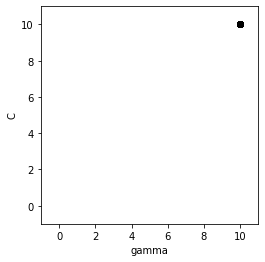

C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 1 is	 score:  94.00829673831784  At (gamma, c):  [10. 10.] .. Time =  0.39092206954956055


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 2 is	 score:  94.01815754349722  At (gamma, c):  [10. 10.] .. Time =  0.38640427589416504


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 3 is	 score:  93.35819087394765  At (gamma, c):  [10. 10.] .. Time =  0.37319231033325195


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 4 is	 score:  95.14254609165148  At (gamma, c):  [10. 10.] .. Time =  0.34274959564208984


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 5 is	 score:  94.21175647245293  At (gamma, c):  [10. 10.] .. Time =  0.3709118366241455


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 6 is	 score:  95.3217564802507  At (gamma, c):  [10. 10.] .. Time =  0.3803534507751465


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 7 is	 score:  95.04151088804069  At (gamma, c):  [10. 10.] .. Time =  0.38578057289123535


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 8 is	 score:  91.7938081340397  At (gamma, c):  [10. 10.] .. Time =  0.39387011528015137


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 9 is	 score:  93.20633840725395  At (gamma, c):  [10. 10.] .. Time =  0.3760194778442383


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 10 is	 score:  92.56563699367297  At (gamma, c):  [10. 10.] .. Time =  0.3750913143157959


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 11 is	 score:  94.86999432693456  At (gamma, c):  [10. 10.] .. Time =  0.3742539882659912


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 12 is	 score:  92.70754245581264  At (gamma, c):  [10. 10.] .. Time =  0.3720064163208008


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 13 is	 score:  94.917986635775  At (gamma, c):  [10. 10.] .. Time =  0.37906455993652344


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 14 is	 score:  93.92673158831991  At (gamma, c):  [10. 10.] .. Time =  0.3841698169708252


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 15 is	 score:  93.07910198338173  At (gamma, c):  [10. 10.] .. Time =  0.385054349899292


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 16 is	 score:  91.6246881554815  At (gamma, c):  [10. 10.] .. Time =  0.3814733028411865


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 17 is	 score:  91.83326907263955  At (gamma, c):  [10. 10.] .. Time =  0.3510622978210449


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 18 is	 score:  92.12439219337563  At (gamma, c):  [10. 10.] .. Time =  0.3274879455566406


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 19 is	 score:  94.26210225628775  At (gamma, c):  [10. 10.] .. Time =  0.3281059265136719


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 20 is	 score:  92.37789814934712  At (gamma, c):  [10. 10.] .. Time =  0.32498955726623535


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 21 is	 score:  93.10615384420655  At (gamma, c):  [10. 10.] .. Time =  0.3460361957550049


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 22 is	 score:  94.722592770943  At (gamma, c):  [10. 10.] .. Time =  0.3490142822265625


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 23 is	 score:  92.03211249757129  At (gamma, c):  [10. 10.] .. Time =  0.33809566497802734


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 24 is	 score:  93.13782011329425  At (gamma, c):  [10. 10.] .. Time =  0.36901307106018066


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 25 is	 score:  95.50048970065342  At (gamma, c):  [10. 10.] .. Time =  0.3764173984527588


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 26 is	 score:  90.73511133340082  At (gamma, c):  [10. 10.] .. Time =  0.3834352493286133


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 27 is	 score:  93.19082826699488  At (gamma, c):  [10. 10.] .. Time =  0.3782045841217041


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 28 is	 score:  95.05001398318441  At (gamma, c):  [10. 10.] .. Time =  0.3807971477508545


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 29 is	 score:  90.87569113601499  At (gamma, c):  [10. 10.] .. Time =  0.3720366954803467


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 30 is	 score:  90.87820016727605  At (gamma, c):  [10. 10.] .. Time =  0.3839445114135742


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 31 is	 score:  92.85331995612549  At (gamma, c):  [10. 10.] .. Time =  0.3779881000518799


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 32 is	 score:  94.68560829386305  At (gamma, c):  [10. 10.] .. Time =  0.38201069831848145


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 33 is	 score:  93.06055872236301  At (gamma, c):  [10. 10.] .. Time =  0.3799874782562256


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 34 is	 score:  90.78032420147666  At (gamma, c):  [10. 10.] .. Time =  0.37894558906555176


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 35 is	 score:  95.52415882344421  At (gamma, c):  [10. 10.] .. Time =  0.4029226303100586


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 36 is	 score:  91.23786576516386  At (gamma, c):  [10. 10.] .. Time =  0.37588977813720703


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 37 is	 score:  91.18251103884747  At (gamma, c):  [10. 10.] .. Time =  0.3773479461669922


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 38 is	 score:  91.48556188809451  At (gamma, c):  [10. 10.] .. Time =  0.37695908546447754


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 39 is	 score:  94.81625879913628  At (gamma, c):  [10. 10.] .. Time =  0.3321971893310547


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 40 is	 score:  92.7289284047934  At (gamma, c):  [10. 10.] .. Time =  0.3389322757720947


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 41 is	 score:  92.53624962169417  At (gamma, c):  [10. 10.] .. Time =  0.36551904678344727


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 42 is	 score:  94.31810466157695  At (gamma, c):  [10. 10.] .. Time =  0.3640596866607666


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 43 is	 score:  93.16543998476641  At (gamma, c):  [10. 10.] .. Time =  0.34308314323425293


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 44 is	 score:  93.31473325421354  At (gamma, c):  [10. 10.] .. Time =  0.3779563903808594


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 45 is	 score:  92.28701583805098  At (gamma, c):  [10. 10.] .. Time =  0.3678109645843506


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 46 is	 score:  92.58893704679991  At (gamma, c):  [10. 10.] .. Time =  0.34516477584838867


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 47 is	 score:  91.14905445032205  At (gamma, c):  [10. 10.] .. Time =  0.3256523609161377


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 48 is	 score:  92.01493184440513  At (gamma, c):  [10. 10.] .. Time =  0.31730008125305176


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 49 is	 score:  93.36568591284006  At (gamma, c):  [10. 10.] .. Time =  0.3527700901031494


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 50 is	 score:  92.85340344268067  At (gamma, c):  [10. 10.] .. Time =  0.3341825008392334


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 51 is	 score:  93.46072042250856  At (gamma, c):  [10. 10.] .. Time =  0.3270895481109619


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 52 is	 score:  91.458743687551  At (gamma, c):  [10. 10.] .. Time =  0.3181493282318115


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 53 is	 score:  93.7427271909766  At (gamma, c):  [10. 10.] .. Time =  0.33311009407043457


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 54 is	 score:  92.22338924107814  At (gamma, c):  [10. 10.] .. Time =  0.32323145866394043


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 55 is	 score:  94.14008558937904  At (gamma, c):  [10. 10.] .. Time =  0.3179318904876709


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 56 is	 score:  94.39234047029433  At (gamma, c):  [10. 10.] .. Time =  0.3190140724182129


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 57 is	 score:  94.49097413406035  At (gamma, c):  [10. 10.] .. Time =  0.3188958168029785


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 58 is	 score:  95.37981288301613  At (gamma, c):  [10. 10.] .. Time =  0.3182351589202881


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 59 is	 score:  91.17138445333327  At (gamma, c):  [10. 10.] .. Time =  0.31461119651794434


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 60 is	 score:  94.31133377083823  At (gamma, c):  [10. 10.] .. Time =  0.317457914352417


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 61 is	 score:  94.60266738440505  At (gamma, c):  [10. 10.] .. Time =  0.3177206516265869


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 62 is	 score:  93.3984605105737  At (gamma, c):  [10. 10.] .. Time =  0.31711864471435547


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 63 is	 score:  91.63578651989718  At (gamma, c):  [10. 10.] .. Time =  0.3151233196258545


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 64 is	 score:  92.8653133250071  At (gamma, c):  [10. 10.] .. Time =  0.31876277923583984


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 65 is	 score:  92.40050943408981  At (gamma, c):  [10. 10.] .. Time =  0.3601827621459961


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 66 is	 score:  94.44570817486527  At (gamma, c):  [10. 10.] .. Time =  0.3311958312988281


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 67 is	 score:  93.592491521674  At (gamma, c):  [10. 10.] .. Time =  0.3249359130859375


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 68 is	 score:  93.8283745619392  At (gamma, c):  [10. 10.] .. Time =  0.3229389190673828


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 69 is	 score:  91.92536049367934  At (gamma, c):  [10. 10.] .. Time =  0.31818532943725586


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 70 is	 score:  93.14620360935398  At (gamma, c):  [10. 10.] .. Time =  0.32509422302246094


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 71 is	 score:  94.14353155274394  At (gamma, c):  [10. 10.] .. Time =  0.31868886947631836


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 72 is	 score:  95.3456568744009  At (gamma, c):  [10. 10.] .. Time =  0.31519365310668945


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 73 is	 score:  90.72800464537734  At (gamma, c):  [10. 10.] .. Time =  0.33106040954589844


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 74 is	 score:  95.07508023090536  At (gamma, c):  [10. 10.] .. Time =  0.3196835517883301


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 75 is	 score:  92.31789315264291  At (gamma, c):  [10. 10.] .. Time =  0.3192477226257324


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 76 is	 score:  94.98286803661433  At (gamma, c):  [10. 10.] .. Time =  0.3189680576324463


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 77 is	 score:  91.14622618598997  At (gamma, c):  [10. 10.] .. Time =  0.31900763511657715


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 78 is	 score:  94.79243401093923  At (gamma, c):  [10. 10.] .. Time =  0.31700897216796875


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 79 is	 score:  92.6440488238052  At (gamma, c):  [10. 10.] .. Time =  0.32700037956237793


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 80 is	 score:  92.34401966499482  At (gamma, c):  [10. 10.] .. Time =  0.328047513961792


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 81 is	 score:  91.18684183300189  At (gamma, c):  [10. 10.] .. Time =  0.32457923889160156


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 82 is	 score:  94.20551259351151  At (gamma, c):  [10. 10.] .. Time =  0.3201439380645752


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 83 is	 score:  92.71926314183493  At (gamma, c):  [10. 10.] .. Time =  0.3181495666503906


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 84 is	 score:  91.26967061856033  At (gamma, c):  [10. 10.] .. Time =  0.32157158851623535


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 85 is	 score:  90.67210530711871  At (gamma, c):  [10. 10.] .. Time =  0.3171212673187256


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 86 is	 score:  94.83599493782137  At (gamma, c):  [10. 10.] .. Time =  0.3201420307159424


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 87 is	 score:  92.17846000870902  At (gamma, c):  [10. 10.] .. Time =  0.31914687156677246


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 88 is	 score:  94.70884922598489  At (gamma, c):  [10. 10.] .. Time =  0.3141601085662842


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 89 is	 score:  93.0340122906526  At (gamma, c):  [10. 10.] .. Time =  0.31316399574279785


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 90 is	 score:  94.0914503248459  At (gamma, c):  [10. 10.] .. Time =  0.3121640682220459


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 91 is	 score:  94.2907385491164  At (gamma, c):  [10. 10.] .. Time =  0.31284141540527344


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 92 is	 score:  91.80835519791111  At (gamma, c):  [10. 10.] .. Time =  0.3157687187194824


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 93 is	 score:  95.34823044891672  At (gamma, c):  [10. 10.] .. Time =  0.3415980339050293


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 94 is	 score:  93.071063587796  At (gamma, c):  [10. 10.] .. Time =  0.34607481956481934


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 95 is	 score:  92.02485392857925  At (gamma, c):  [10. 10.] .. Time =  0.35505223274230957


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 96 is	 score:  92.70013597145216  At (gamma, c):  [10. 10.] .. Time =  0.3450772762298584


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 97 is	 score:  95.25817323242681  At (gamma, c):  [10. 10.] .. Time =  0.32123565673828125


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 98 is	 score:  94.10213203850789  At (gamma, c):  [10. 10.] .. Time =  0.3419938087463379


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 99 is	 score:  93.2992386115408  At (gamma, c):  [10. 10.] .. Time =  0.33514833450317383


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 100 is	 score:  94.94554601350521  At (gamma, c):  [10. 10.] .. Time =  0.33216404914855957


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

The best position in iteration number 2 is [inf inf] with AUC: nan
34.94548678398132


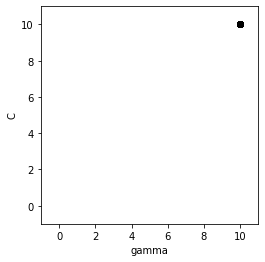

C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 1 is	 score:  91.9667301460037  At (gamma, c):  [10. 10.] .. Time =  0.3216972351074219


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 2 is	 score:  91.5109915997156  At (gamma, c):  [10. 10.] .. Time =  0.32114195823669434


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 3 is	 score:  92.88322344879379  At (gamma, c):  [10. 10.] .. Time =  0.33115196228027344


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 4 is	 score:  95.10641717257059  At (gamma, c):  [10. 10.] .. Time =  0.32869553565979004


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 5 is	 score:  94.67141533589461  At (gamma, c):  [10. 10.] .. Time =  0.3202657699584961


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 6 is	 score:  92.03202385068505  At (gamma, c):  [10. 10.] .. Time =  0.33225417137145996


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 7 is	 score:  92.63654619603763  At (gamma, c):  [10. 10.] .. Time =  0.31815218925476074


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 8 is	 score:  91.1062082513017  At (gamma, c):  [10. 10.] .. Time =  0.31618785858154297


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 9 is	 score:  94.21337488594197  At (gamma, c):  [10. 10.] .. Time =  0.31734156608581543


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 10 is	 score:  93.68839766522956  At (gamma, c):  [10. 10.] .. Time =  0.3238551616668701


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 11 is	 score:  91.50612885535628  At (gamma, c):  [10. 10.] .. Time =  0.3193070888519287


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 12 is	 score:  92.8657064529647  At (gamma, c):  [10. 10.] .. Time =  0.31670427322387695


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 13 is	 score:  91.14599382435632  At (gamma, c):  [10. 10.] .. Time =  0.31731200218200684


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 14 is	 score:  94.56515438923475  At (gamma, c):  [10. 10.] .. Time =  0.3159911632537842


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 15 is	 score:  92.71368173176195  At (gamma, c):  [10. 10.] .. Time =  0.31815052032470703


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 16 is	 score:  92.46294049034752  At (gamma, c):  [10. 10.] .. Time =  0.31417083740234375


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 17 is	 score:  90.94090572600534  At (gamma, c):  [10. 10.] .. Time =  0.31515979766845703


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 18 is	 score:  92.94689323592192  At (gamma, c):  [10. 10.] .. Time =  0.3161196708679199


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 19 is	 score:  93.40108304209194  At (gamma, c):  [10. 10.] .. Time =  0.31615471839904785


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 20 is	 score:  95.08088394048838  At (gamma, c):  [10. 10.] .. Time =  0.3699376583099365


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 21 is	 score:  94.4381535481803  At (gamma, c):  [10. 10.] .. Time =  0.3171508312225342


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 22 is	 score:  93.76066878510122  At (gamma, c):  [10. 10.] .. Time =  0.31519055366516113


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 23 is	 score:  90.65610765711743  At (gamma, c):  [10. 10.] .. Time =  0.3171560764312744


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 24 is	 score:  92.87630494300552  At (gamma, c):  [10. 10.] .. Time =  0.31815075874328613


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 25 is	 score:  92.10923403401073  At (gamma, c):  [10. 10.] .. Time =  0.3240966796875


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 26 is	 score:  92.1356140744371  At (gamma, c):  [10. 10.] .. Time =  0.33809781074523926


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 27 is	 score:  92.89529730136648  At (gamma, c):  [10. 10.] .. Time =  0.3227806091308594


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 28 is	 score:  93.67406284756417  At (gamma, c):  [10. 10.] .. Time =  0.3338596820831299


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 29 is	 score:  93.22789950158402  At (gamma, c):  [10. 10.] .. Time =  0.32698822021484375


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 30 is	 score:  95.39136207410812  At (gamma, c):  [10. 10.] .. Time =  0.31883859634399414


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 31 is	 score:  94.33025989552114  At (gamma, c):  [10. 10.] .. Time =  0.3191673755645752


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 32 is	 score:  93.77762777472464  At (gamma, c):  [10. 10.] .. Time =  0.31815123558044434


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 33 is	 score:  92.02548828003629  At (gamma, c):  [10. 10.] .. Time =  0.31714916229248047


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 34 is	 score:  94.17588781587266  At (gamma, c):  [10. 10.] .. Time =  0.31622886657714844


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 35 is	 score:  95.15993096783635  At (gamma, c):  [10. 10.] .. Time =  0.3167531490325928


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 36 is	 score:  90.92728330290255  At (gamma, c):  [10. 10.] .. Time =  0.31633424758911133


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 37 is	 score:  93.86315244366631  At (gamma, c):  [10. 10.] .. Time =  0.3191795349121094


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 38 is	 score:  90.70904348507766  At (gamma, c):  [10. 10.] .. Time =  0.32114171981811523


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 39 is	 score:  95.22003474183943  At (gamma, c):  [10. 10.] .. Time =  0.31818056106567383


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 40 is	 score:  91.53715958502731  At (gamma, c):  [10. 10.] .. Time =  0.32117342948913574


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 41 is	 score:  94.3412389267757  At (gamma, c):  [10. 10.] .. Time =  0.3361036777496338


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 42 is	 score:  94.94375690793686  At (gamma, c):  [10. 10.] .. Time =  0.3523368835449219


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 43 is	 score:  91.5140904883527  At (gamma, c):  [10. 10.] .. Time =  0.3541097640991211


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 44 is	 score:  92.53659011047505  At (gamma, c):  [10. 10.] .. Time =  0.3238687515258789


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 45 is	 score:  93.00900967361338  At (gamma, c):  [10. 10.] .. Time =  0.32509803771972656


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 46 is	 score:  92.01986260532395  At (gamma, c):  [10. 10.] .. Time =  0.3211705684661865


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 47 is	 score:  94.76756738190396  At (gamma, c):  [10. 10.] .. Time =  0.31822752952575684


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 48 is	 score:  92.2660222264841  At (gamma, c):  [10. 10.] .. Time =  0.3171231746673584


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 49 is	 score:  94.34532250148567  At (gamma, c):  [10. 10.] .. Time =  0.31989455223083496


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 50 is	 score:  90.9927176898552  At (gamma, c):  [10. 10.] .. Time =  0.32117366790771484


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 51 is	 score:  93.12518480950251  At (gamma, c):  [10. 10.] .. Time =  0.320969820022583


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 52 is	 score:  90.70944696321644  At (gamma, c):  [10. 10.] .. Time =  0.3238956928253174


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 53 is	 score:  94.34011512842898  At (gamma, c):  [10. 10.] .. Time =  0.33201098442077637


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 54 is	 score:  93.47803543591917  At (gamma, c):  [10. 10.] .. Time =  0.3221449851989746


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 55 is	 score:  92.67318324257415  At (gamma, c):  [10. 10.] .. Time =  0.31771302223205566


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 56 is	 score:  95.12912799022001  At (gamma, c):  [10. 10.] .. Time =  0.31899428367614746


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 57 is	 score:  94.0333139974268  At (gamma, c):  [10. 10.] .. Time =  0.34038567543029785


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 58 is	 score:  92.85216877924846  At (gamma, c):  [10. 10.] .. Time =  0.3297078609466553


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 59 is	 score:  95.039480193924  At (gamma, c):  [10. 10.] .. Time =  0.32314610481262207


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 60 is	 score:  92.52263123917318  At (gamma, c):  [10. 10.] .. Time =  0.31598544120788574


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 61 is	 score:  92.96163501127887  At (gamma, c):  [10. 10.] .. Time =  0.3171870708465576


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 62 is	 score:  94.95333585845634  At (gamma, c):  [10. 10.] .. Time =  0.33388590812683105


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 63 is	 score:  94.29076651720412  At (gamma, c):  [10. 10.] .. Time =  0.32054758071899414


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 64 is	 score:  92.54534725749896  At (gamma, c):  [10. 10.] .. Time =  0.3181493282318115


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 65 is	 score:  91.94591681515074  At (gamma, c):  [10. 10.] .. Time =  0.3208887577056885


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 66 is	 score:  91.20884485342238  At (gamma, c):  [10. 10.] .. Time =  0.32712340354919434


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 67 is	 score:  93.56884249862303  At (gamma, c):  [10. 10.] .. Time =  0.31615424156188965


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 68 is	 score:  91.65760790748602  At (gamma, c):  [10. 10.] .. Time =  0.3181493282318115


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 69 is	 score:  94.74076333478212  At (gamma, c):  [10. 10.] .. Time =  0.32013916969299316


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 70 is	 score:  95.40626707886268  At (gamma, c):  [10. 10.] .. Time =  0.31914687156677246


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 71 is	 score:  90.71326928280854  At (gamma, c):  [10. 10.] .. Time =  0.3176710605621338


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 72 is	 score:  95.30951829651922  At (gamma, c):  [10. 10.] .. Time =  0.322171688079834


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 73 is	 score:  93.59275960195185  At (gamma, c):  [10. 10.] .. Time =  0.34207820892333984


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 74 is	 score:  91.64257668345654  At (gamma, c):  [10. 10.] .. Time =  0.3266594409942627


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 75 is	 score:  93.31389644812037  At (gamma, c):  [10. 10.] .. Time =  0.33072972297668457


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 76 is	 score:  90.93346315755132  At (gamma, c):  [10. 10.] .. Time =  0.32213711738586426


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 77 is	 score:  90.84139026775377  At (gamma, c):  [10. 10.] .. Time =  0.31389951705932617


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 78 is	 score:  91.27194571669821  At (gamma, c):  [10. 10.] .. Time =  0.3310818672180176


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 79 is	 score:  90.58186203300964  At (gamma, c):  [10. 10.] .. Time =  0.34117841720581055


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 80 is	 score:  93.88908982865144  At (gamma, c):  [10. 10.] .. Time =  0.3316352367401123


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 81 is	 score:  93.50889053393  At (gamma, c):  [10. 10.] .. Time =  0.31865572929382324


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 82 is	 score:  94.73027739837931  At (gamma, c):  [10. 10.] .. Time =  0.3181495666503906


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 83 is	 score:  94.28273245642741  At (gamma, c):  [10. 10.] .. Time =  0.3181493282318115


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 84 is	 score:  94.26899947080983  At (gamma, c):  [10. 10.] .. Time =  0.31610608100891113


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 85 is	 score:  91.96019095264002  At (gamma, c):  [10. 10.] .. Time =  0.32117319107055664


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 86 is	 score:  92.77281762607058  At (gamma, c):  [10. 10.] .. Time =  0.31813526153564453


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 87 is	 score:  94.96290115823167  At (gamma, c):  [10. 10.] .. Time =  0.3253803253173828


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 88 is	 score:  94.50834443593754  At (gamma, c):  [10. 10.] .. Time =  0.33812522888183594


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 89 is	 score:  94.2717007446593  At (gamma, c):  [10. 10.] .. Time =  0.31914663314819336


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 90 is	 score:  94.2499615286997  At (gamma, c):  [10. 10.] .. Time =  0.32712554931640625


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 91 is	 score:  94.50223999962418  At (gamma, c):  [10. 10.] .. Time =  0.3430924415588379


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 92 is	 score:  94.58186196403952  At (gamma, c):  [10. 10.] .. Time =  0.3520481586456299


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 93 is	 score:  93.58233659615145  At (gamma, c):  [10. 10.] .. Time =  0.3281233310699463


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 94 is	 score:  90.93253614622739  At (gamma, c):  [10. 10.] .. Time =  0.31914591789245605


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 95 is	 score:  93.8992555232973  At (gamma, c):  [10. 10.] .. Time =  0.3181488513946533


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 96 is	 score:  95.05665484673074  At (gamma, c):  [10. 10.] .. Time =  0.31618833541870117


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 97 is	 score:  92.9491360737694  At (gamma, c):  [10. 10.] .. Time =  0.3310818672180176


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 98 is	 score:  95.34088487624427  At (gamma, c):  [10. 10.] .. Time =  0.3171517848968506


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 99 is	 score:  91.87973077340297  At (gamma, c):  [10. 10.] .. Time =  0.3171520233154297


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 100 is	 score:  93.52025022816663  At (gamma, c):  [10. 10.] .. Time =  0.3201444149017334


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
*c* arg

The best position in iteration number 3 is [inf inf] with AUC: nan
32.845465421676636


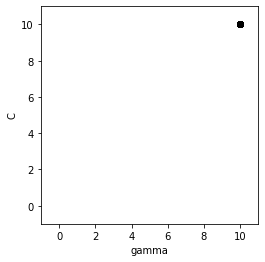

C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 1 is	 score:  92.26634821288438  At (gamma, c):  [10. 10.] .. Time =  0.31965208053588867


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 2 is	 score:  94.02618934824346  At (gamma, c):  [10. 10.] .. Time =  0.3239259719848633


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 3 is	 score:  91.23427222244607  At (gamma, c):  [10. 10.] .. Time =  0.3303048610687256


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 4 is	 score:  92.5294653365063  At (gamma, c):  [10. 10.] .. Time =  0.33371973037719727


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 5 is	 score:  95.54581447726576  At (gamma, c):  [10. 10.] .. Time =  0.33011460304260254


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 6 is	 score:  90.56419697862805  At (gamma, c):  [10. 10.] .. Time =  0.3201448917388916


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 7 is	 score:  91.51482285775931  At (gamma, c):  [10. 10.] .. Time =  0.3228793144226074


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 8 is	 score:  95.35443495010504  At (gamma, c):  [10. 10.] .. Time =  0.3329493999481201


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 9 is	 score:  93.8551026436056  At (gamma, c):  [10. 10.] .. Time =  0.33008480072021484


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 10 is	 score:  94.46872039336232  At (gamma, c):  [10. 10.] .. Time =  0.3171517848968506


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 11 is	 score:  93.19868595687028  At (gamma, c):  [10. 10.] .. Time =  0.3171558380126953


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 12 is	 score:  95.39164256669231  At (gamma, c):  [10. 10.] .. Time =  0.3100860118865967


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 13 is	 score:  93.93063456972584  At (gamma, c):  [10. 10.] .. Time =  0.31016993522644043


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 14 is	 score:  94.99631775808989  At (gamma, c):  [10. 10.] .. Time =  0.31116795539855957


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 15 is	 score:  92.81826875773304  At (gamma, c):  [10. 10.] .. Time =  0.31116795539855957


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 16 is	 score:  93.95593975843197  At (gamma, c):  [10. 10.] .. Time =  0.31116771697998047


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 17 is	 score:  94.84792880679518  At (gamma, c):  [10. 10.] .. Time =  0.3146793842315674


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 18 is	 score:  95.25882908118773  At (gamma, c):  [10. 10.] .. Time =  0.33513426780700684


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 19 is	 score:  91.00455384497464  At (gamma, c):  [10. 10.] .. Time =  0.3251633644104004


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 20 is	 score:  91.75884742007487  At (gamma, c):  [10. 10.] .. Time =  0.33207154273986816


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 21 is	 score:  92.153728233098  At (gamma, c):  [10. 10.] .. Time =  0.328122615814209


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 22 is	 score:  94.15841299805783  At (gamma, c):  [10. 10.] .. Time =  0.3171522617340088


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 23 is	 score:  92.14609006707582  At (gamma, c):  [10. 10.] .. Time =  0.31914687156677246


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 24 is	 score:  94.40241855017773  At (gamma, c):  [10. 10.] .. Time =  0.31615471839904785


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 25 is	 score:  94.15584156788452  At (gamma, c):  [10. 10.] .. Time =  0.31865668296813965


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 26 is	 score:  94.19959045807914  At (gamma, c):  [10. 10.] .. Time =  0.3181495666503906


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 27 is	 score:  95.45090292061396  At (gamma, c):  [10. 10.] .. Time =  0.3311014175415039


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 28 is	 score:  92.56142351566776  At (gamma, c):  [10. 10.] .. Time =  0.33410191535949707


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 29 is	 score:  94.51767556165885  At (gamma, c):  [10. 10.] .. Time =  0.3192718029022217


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 30 is	 score:  91.47580938098143  At (gamma, c):  [10. 10.] .. Time =  0.31908488273620605


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 31 is	 score:  92.63988203334375  At (gamma, c):  [10. 10.] .. Time =  0.3199350833892822


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 32 is	 score:  94.73366515006086  At (gamma, c):  [10. 10.] .. Time =  0.32144951820373535


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 33 is	 score:  91.77943352569802  At (gamma, c):  [10. 10.] .. Time =  0.32059216499328613


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 34 is	 score:  91.14402327382207  At (gamma, c):  [10. 10.] .. Time =  0.31798815727233887


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 35 is	 score:  91.0438321539847  At (gamma, c):  [10. 10.] .. Time =  0.3175063133239746


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 36 is	 score:  92.08113999189665  At (gamma, c):  [10. 10.] .. Time =  0.31948423385620117


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 37 is	 score:  94.29200531869549  At (gamma, c):  [10. 10.] .. Time =  0.3210608959197998


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 38 is	 score:  93.31239616783178  At (gamma, c):  [10. 10.] .. Time =  0.3380148410797119


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 39 is	 score:  90.8118454053252  At (gamma, c):  [10. 10.] .. Time =  0.3510253429412842


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 40 is	 score:  95.18382245755711  At (gamma, c):  [10. 10.] .. Time =  0.3461763858795166


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 41 is	 score:  92.8143449711074  At (gamma, c):  [10. 10.] .. Time =  0.3390929698944092


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 42 is	 score:  92.74530597727896  At (gamma, c):  [10. 10.] .. Time =  0.32570314407348633


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 43 is	 score:  94.0447864176595  At (gamma, c):  [10. 10.] .. Time =  0.31899142265319824


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 44 is	 score:  94.0945092993424  At (gamma, c):  [10. 10.] .. Time =  0.3189551830291748


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 45 is	 score:  93.33192628247033  At (gamma, c):  [10. 10.] .. Time =  0.32004880905151367


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 46 is	 score:  91.0919898011299  At (gamma, c):  [10. 10.] .. Time =  0.3190467357635498


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 47 is	 score:  95.10395006199478  At (gamma, c):  [10. 10.] .. Time =  0.3210904598236084


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 48 is	 score:  93.57113890032699  At (gamma, c):  [10. 10.] .. Time =  0.31573486328125


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 49 is	 score:  92.19695967611185  At (gamma, c):  [10. 10.] .. Time =  0.3353159427642822


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 50 is	 score:  93.80599799617056  At (gamma, c):  [10. 10.] .. Time =  0.3170204162597656


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 51 is	 score:  93.07544032894158  At (gamma, c):  [10. 10.] .. Time =  0.31674814224243164


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 52 is	 score:  94.64862196834841  At (gamma, c):  [10. 10.] .. Time =  0.3311440944671631


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 53 is	 score:  91.00955454216673  At (gamma, c):  [10. 10.] .. Time =  0.3238961696624756


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 54 is	 score:  90.98602480166288  At (gamma, c):  [10. 10.] .. Time =  0.32114100456237793


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 55 is	 score:  90.76824281492202  At (gamma, c):  [10. 10.] .. Time =  0.31615424156188965


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 56 is	 score:  90.6254221866891  At (gamma, c):  [10. 10.] .. Time =  0.33011817932128906


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 57 is	 score:  91.26749415861664  At (gamma, c):  [10. 10.] .. Time =  0.31159114837646484


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 58 is	 score:  91.12800531090753  At (gamma, c):  [10. 10.] .. Time =  0.361954927444458


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 59 is	 score:  95.29151702237047  At (gamma, c):  [10. 10.] .. Time =  0.3324306011199951


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 60 is	 score:  93.36429657311535  At (gamma, c):  [10. 10.] .. Time =  0.33000969886779785


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 61 is	 score:  93.061742822854  At (gamma, c):  [10. 10.] .. Time =  0.3400883674621582


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 62 is	 score:  92.68045584986422  At (gamma, c):  [10. 10.] .. Time =  0.3529977798461914


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 63 is	 score:  95.08069876307444  At (gamma, c):  [10. 10.] .. Time =  0.3410654067993164


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 64 is	 score:  93.06082916953223  At (gamma, c):  [10. 10.] .. Time =  0.3679826259613037


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 65 is	 score:  93.08512849346569  At (gamma, c):  [10. 10.] .. Time =  0.36602282524108887


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 66 is	 score:  95.18870809462126  At (gamma, c):  [10. 10.] .. Time =  0.39125585556030273


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 67 is	 score:  92.80483608178129  At (gamma, c):  [10. 10.] .. Time =  0.32667088508605957


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 68 is	 score:  93.99285946029929  At (gamma, c):  [10. 10.] .. Time =  0.3640263080596924


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 69 is	 score:  92.64831855684226  At (gamma, c):  [10. 10.] .. Time =  0.36801671981811523


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 70 is	 score:  94.30907267229927  At (gamma, c):  [10. 10.] .. Time =  0.37100744247436523


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 71 is	 score:  91.82111334215466  At (gamma, c):  [10. 10.] .. Time =  0.37898755073547363


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 72 is	 score:  94.23844137458782  At (gamma, c):  [10. 10.] .. Time =  0.34364748001098633


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 73 is	 score:  94.94732828092938  At (gamma, c):  [10. 10.] .. Time =  0.3370985984802246


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 74 is	 score:  91.17748183982117  At (gamma, c):  [10. 10.] .. Time =  0.3291199207305908


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 75 is	 score:  90.88100690953952  At (gamma, c):  [10. 10.] .. Time =  0.31615447998046875


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 76 is	 score:  90.87289741504713  At (gamma, c):  [10. 10.] .. Time =  0.3252112865447998


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 77 is	 score:  95.16453253262571  At (gamma, c):  [10. 10.] .. Time =  0.3371298313140869


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 78 is	 score:  91.24375805003001  At (gamma, c):  [10. 10.] .. Time =  0.3251371383666992


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 79 is	 score:  92.48827292022584  At (gamma, c):  [10. 10.] .. Time =  0.3343789577484131


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 80 is	 score:  92.1807492252399  At (gamma, c):  [10. 10.] .. Time =  0.322784423828125


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 81 is	 score:  92.56908263839598  At (gamma, c):  [10. 10.] .. Time =  0.3190572261810303


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 82 is	 score:  93.23939447912612  At (gamma, c):  [10. 10.] .. Time =  0.3171658515930176


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 83 is	 score:  93.67435654191733  At (gamma, c):  [10. 10.] .. Time =  0.3181493282318115


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 84 is	 score:  93.62537783479098  At (gamma, c):  [10. 10.] .. Time =  0.3171529769897461


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 85 is	 score:  92.75322919829397  At (gamma, c):  [10. 10.] .. Time =  0.3117070198059082


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 86 is	 score:  95.38862853587536  At (gamma, c):  [10. 10.] .. Time =  0.33390164375305176


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 87 is	 score:  93.87755965983015  At (gamma, c):  [10. 10.] .. Time =  0.3584909439086914


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 88 is	 score:  92.02655608667891  At (gamma, c):  [10. 10.] .. Time =  0.3589286804199219


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 89 is	 score:  90.96158398641708  At (gamma, c):  [10. 10.] .. Time =  0.3310813903808594


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 90 is	 score:  91.38045893211704  At (gamma, c):  [10. 10.] .. Time =  0.3176567554473877


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 91 is	 score:  94.30940738015427  At (gamma, c):  [10. 10.] .. Time =  0.32080960273742676


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 92 is	 score:  93.25401184925457  At (gamma, c):  [10. 10.] .. Time =  0.3301210403442383


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 93 is	 score:  90.75080270934282  At (gamma, c):  [10. 10.] .. Time =  0.32114195823669434


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 94 is	 score:  92.08385099258018  At (gamma, c):  [10. 10.] .. Time =  0.33809566497802734


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 95 is	 score:  91.1681508204724  At (gamma, c):  [10. 10.] .. Time =  0.3171522617340088


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 96 is	 score:  90.71894455357233  At (gamma, c):  [10. 10.] .. Time =  0.3171517848968506


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 97 is	 score:  93.83933995595054  At (gamma, c):  [10. 10.] .. Time =  0.323136568069458


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 98 is	 score:  92.30414155832331  At (gamma, c):  [10. 10.] .. Time =  0.31615471839904785


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 99 is	 score:  93.70696416537632  At (gamma, c):  [10. 10.] .. Time =  0.31316280364990234


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 100 is	 score:  91.91129363524955  At (gamma, c):  [10. 10.] .. Time =  0.3146553039550781


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
*c* arg

The best position in iteration number 4 is [inf inf] with AUC: nan
33.345191955566406


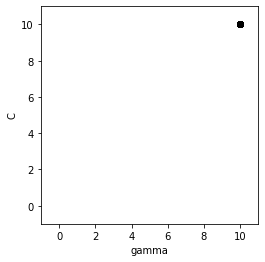

C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 1 is	 score:  90.577548534043  At (gamma, c):  [10. 10.] .. Time =  0.3156702518463135


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 2 is	 score:  94.03324307297227  At (gamma, c):  [10. 10.] .. Time =  0.32213878631591797


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 3 is	 score:  93.44136384016619  At (gamma, c):  [10. 10.] .. Time =  0.33118295669555664


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 4 is	 score:  91.9743597179674  At (gamma, c):  [10. 10.] .. Time =  0.33674073219299316


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 5 is	 score:  94.46155197504113  At (gamma, c):  [10. 10.] .. Time =  0.3306541442871094


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 6 is	 score:  95.17151804495491  At (gamma, c):  [10. 10.] .. Time =  0.34441065788269043


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 7 is	 score:  95.24120860281798  At (gamma, c):  [10. 10.] .. Time =  0.31366825103759766


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 8 is	 score:  90.5507346618116  At (gamma, c):  [10. 10.] .. Time =  0.3272738456726074


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 9 is	 score:  92.99139599084761  At (gamma, c):  [10. 10.] .. Time =  0.3297889232635498


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 10 is	 score:  91.0080088150947  At (gamma, c):  [10. 10.] .. Time =  0.31615447998046875


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 11 is	 score:  94.0097203244763  At (gamma, c):  [10. 10.] .. Time =  0.314159631729126


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 12 is	 score:  92.38166005391578  At (gamma, c):  [10. 10.] .. Time =  0.32143187522888184


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 13 is	 score:  95.06455509518679  At (gamma, c):  [10. 10.] .. Time =  0.3211240768432617


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 14 is	 score:  95.5364603102813  At (gamma, c):  [10. 10.] .. Time =  0.31510305404663086


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 15 is	 score:  93.78802938989125  At (gamma, c):  [10. 10.] .. Time =  0.3141601085662842


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 16 is	 score:  93.7609163644474  At (gamma, c):  [10. 10.] .. Time =  0.31116771697998047


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 17 is	 score:  94.9290541627334  At (gamma, c):  [10. 10.] .. Time =  0.30869030952453613


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 18 is	 score:  95.38207313507903  At (gamma, c):  [10. 10.] .. Time =  0.3140292167663574


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 19 is	 score:  93.44830237595632  At (gamma, c):  [10. 10.] .. Time =  0.3152148723602295


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 20 is	 score:  93.55666916964623  At (gamma, c):  [10. 10.] .. Time =  0.3231360912322998


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 21 is	 score:  90.73821390092542  At (gamma, c):  [10. 10.] .. Time =  0.31215643882751465


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 22 is	 score:  91.13514654714795  At (gamma, c):  [10. 10.] .. Time =  0.3166499137878418


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 23 is	 score:  93.74814018378791  At (gamma, c):  [10. 10.] .. Time =  0.3585493564605713


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 24 is	 score:  93.19315211113083  At (gamma, c):  [10. 10.] .. Time =  0.3450775146484375


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 25 is	 score:  95.13960775810517  At (gamma, c):  [10. 10.] .. Time =  0.39615583419799805


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 26 is	 score:  93.87133767246364  At (gamma, c):  [10. 10.] .. Time =  0.37288570404052734


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 27 is	 score:  94.16628454942149  At (gamma, c):  [10. 10.] .. Time =  0.3665034770965576


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 28 is	 score:  95.29277435525604  At (gamma, c):  [10. 10.] .. Time =  0.33787035942077637


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 29 is	 score:  93.18502346035025  At (gamma, c):  [10. 10.] .. Time =  0.38621997833251953


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 30 is	 score:  94.59630748484149  At (gamma, c):  [10. 10.] .. Time =  0.37157273292541504


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 31 is	 score:  94.09851578315862  At (gamma, c):  [10. 10.] .. Time =  0.35815858840942383


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 32 is	 score:  91.4236257600613  At (gamma, c):  [10. 10.] .. Time =  0.3520376682281494


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 33 is	 score:  91.45425115939751  At (gamma, c):  [10. 10.] .. Time =  0.37467050552368164


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 34 is	 score:  91.70867693061626  At (gamma, c):  [10. 10.] .. Time =  0.3909142017364502


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 35 is	 score:  92.09518635718815  At (gamma, c):  [10. 10.] .. Time =  0.3946523666381836


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 36 is	 score:  92.77781050418857  At (gamma, c):  [10. 10.] .. Time =  0.3341054916381836


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 37 is	 score:  90.98182209454357  At (gamma, c):  [10. 10.] .. Time =  0.32712483406066895


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 38 is	 score:  90.9218536543127  At (gamma, c):  [10. 10.] .. Time =  0.35606813430786133


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 39 is	 score:  93.92816106601654  At (gamma, c):  [10. 10.] .. Time =  0.37346887588500977


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 40 is	 score:  92.16810106734518  At (gamma, c):  [10. 10.] .. Time =  0.3396942615509033


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 41 is	 score:  95.17445356011025  At (gamma, c):  [10. 10.] .. Time =  0.35551023483276367


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 42 is	 score:  94.5029087729521  At (gamma, c):  [10. 10.] .. Time =  0.3670530319213867


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 43 is	 score:  94.42474147585072  At (gamma, c):  [10. 10.] .. Time =  0.40041399002075195


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 44 is	 score:  91.55345995361787  At (gamma, c):  [10. 10.] .. Time =  0.34761738777160645


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 45 is	 score:  95.19673789307559  At (gamma, c):  [10. 10.] .. Time =  0.36803507804870605


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 46 is	 score:  93.66824395983292  At (gamma, c):  [10. 10.] .. Time =  0.3858640193939209


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 47 is	 score:  94.2351721479813  At (gamma, c):  [10. 10.] .. Time =  0.4044151306152344


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 48 is	 score:  94.90458100665893  At (gamma, c):  [10. 10.] .. Time =  0.39241957664489746


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 49 is	 score:  93.92472897171496  At (gamma, c):  [10. 10.] .. Time =  0.3650400638580322


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 50 is	 score:  95.14884082998044  At (gamma, c):  [10. 10.] .. Time =  0.3505702018737793


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 51 is	 score:  92.75979788249661  At (gamma, c):  [10. 10.] .. Time =  0.3471405506134033


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 52 is	 score:  94.8267381460879  At (gamma, c):  [10. 10.] .. Time =  0.35253286361694336


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 53 is	 score:  94.21951081095192  At (gamma, c):  [10. 10.] .. Time =  0.38358616828918457


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 54 is	 score:  93.9895406020668  At (gamma, c):  [10. 10.] .. Time =  0.34707164764404297


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 55 is	 score:  92.33845568018062  At (gamma, c):  [10. 10.] .. Time =  0.34707164764404297


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 56 is	 score:  92.52825883159305  At (gamma, c):  [10. 10.] .. Time =  0.3613581657409668


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 57 is	 score:  95.51838471852545  At (gamma, c):  [10. 10.] .. Time =  0.36437368392944336


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 58 is	 score:  92.93759700231834  At (gamma, c):  [10. 10.] .. Time =  0.36103343963623047


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 59 is	 score:  91.09376039249432  At (gamma, c):  [10. 10.] .. Time =  0.34360551834106445


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 60 is	 score:  93.71834250596257  At (gamma, c):  [10. 10.] .. Time =  0.3270690441131592


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 61 is	 score:  95.06126743353208  At (gamma, c):  [10. 10.] .. Time =  0.32904911041259766


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 62 is	 score:  94.22715143421439  At (gamma, c):  [10. 10.] .. Time =  0.32517123222351074


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 63 is	 score:  92.68468493648437  At (gamma, c):  [10. 10.] .. Time =  0.33011770248413086


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 64 is	 score:  95.53596689299236  At (gamma, c):  [10. 10.] .. Time =  0.3221132755279541


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 65 is	 score:  92.39432439170827  At (gamma, c):  [10. 10.] .. Time =  0.32685041427612305


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 66 is	 score:  94.9324949438502  At (gamma, c):  [10. 10.] .. Time =  0.3354628086090088


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 67 is	 score:  91.43720385786258  At (gamma, c):  [10. 10.] .. Time =  0.33367133140563965


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 68 is	 score:  91.99313735309062  At (gamma, c):  [10. 10.] .. Time =  0.3151576519012451


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 69 is	 score:  92.02559721790907  At (gamma, c):  [10. 10.] .. Time =  0.32164859771728516


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 70 is	 score:  95.49852860350131  At (gamma, c):  [10. 10.] .. Time =  0.32567310333251953


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 71 is	 score:  95.03399749971047  At (gamma, c):  [10. 10.] .. Time =  0.33107900619506836


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 72 is	 score:  94.7447401380845  At (gamma, c):  [10. 10.] .. Time =  0.3221395015716553


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 73 is	 score:  93.62661552628555  At (gamma, c):  [10. 10.] .. Time =  0.3200795650482178


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 74 is	 score:  92.39378102688055  At (gamma, c):  [10. 10.] .. Time =  0.31915998458862305


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 75 is	 score:  94.77011852849007  At (gamma, c):  [10. 10.] .. Time =  0.3400895595550537


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 76 is	 score:  95.11876580596025  At (gamma, c):  [10. 10.] .. Time =  0.31914663314819336


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 77 is	 score:  93.79547037069882  At (gamma, c):  [10. 10.] .. Time =  0.3196544647216797


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 78 is	 score:  94.22643877021375  At (gamma, c):  [10. 10.] .. Time =  0.31964993476867676


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 79 is	 score:  91.49047003797895  At (gamma, c):  [10. 10.] .. Time =  0.33263301849365234


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 80 is	 score:  92.69528283346293  At (gamma, c):  [10. 10.] .. Time =  0.33907246589660645


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 81 is	 score:  92.68220187174171  At (gamma, c):  [10. 10.] .. Time =  0.3390815258026123


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 82 is	 score:  92.1645390524016  At (gamma, c):  [10. 10.] .. Time =  0.3236405849456787


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 83 is	 score:  90.67074963855009  At (gamma, c):  [10. 10.] .. Time =  0.3201439380645752


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 84 is	 score:  92.23099605707873  At (gamma, c):  [10. 10.] .. Time =  0.3236551284790039


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 85 is	 score:  93.39454885217847  At (gamma, c):  [10. 10.] .. Time =  0.3256697654724121


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 86 is	 score:  94.03240838270642  At (gamma, c):  [10. 10.] .. Time =  0.3320784568786621


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 87 is	 score:  91.58851530904867  At (gamma, c):  [10. 10.] .. Time =  0.33311033248901367


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 88 is	 score:  94.30178610674787  At (gamma, c):  [10. 10.] .. Time =  0.33011722564697266


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 89 is	 score:  93.07613716475751  At (gamma, c):  [10. 10.] .. Time =  0.3151576519012451


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 90 is	 score:  91.74527588755548  At (gamma, c):  [10. 10.] .. Time =  0.31914615631103516


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 91 is	 score:  94.15170712265744  At (gamma, c):  [10. 10.] .. Time =  0.33809590339660645


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 92 is	 score:  92.3580673349537  At (gamma, c):  [10. 10.] .. Time =  0.3191540241241455


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 93 is	 score:  92.29938436650582  At (gamma, c):  [10. 10.] .. Time =  0.33063578605651855


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 94 is	 score:  95.20627735640443  At (gamma, c):  [10. 10.] .. Time =  0.3730435371398926


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 95 is	 score:  94.12606042387158  At (gamma, c):  [10. 10.] .. Time =  0.3584256172180176


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 96 is	 score:  92.93221381199845  At (gamma, c):  [10. 10.] .. Time =  0.43784070014953613


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 97 is	 score:  95.34617328010617  At (gamma, c):  [10. 10.] .. Time =  0.3755025863647461


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 98 is	 score:  92.48098186475154  At (gamma, c):  [10. 10.] .. Time =  0.351560115814209


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 99 is	 score:  92.49317952145671  At (gamma, c):  [10. 10.] .. Time =  0.33610105514526367


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 100 is	 score:  90.57886598082052  At (gamma, c):  [10. 10.] .. Time =  0.3380260467529297


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
*c* arg

The best position in iteration number 5 is [inf inf] with AUC: nan
34.69793891906738


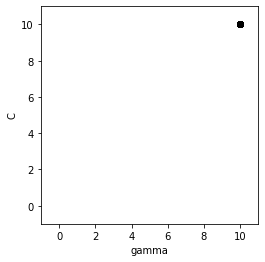

C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 1 is	 score:  91.83265854178369  At (gamma, c):  [10. 10.] .. Time =  0.3684859275817871


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 2 is	 score:  90.58723741439532  At (gamma, c):  [10. 10.] .. Time =  0.4316587448120117


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 3 is	 score:  91.5281957047255  At (gamma, c):  [10. 10.] .. Time =  0.42185521125793457


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 4 is	 score:  93.14628367741219  At (gamma, c):  [10. 10.] .. Time =  0.3700118064880371


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 5 is	 score:  93.13606567518543  At (gamma, c):  [10. 10.] .. Time =  0.36600184440612793


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 6 is	 score:  92.17236405041295  At (gamma, c):  [10. 10.] .. Time =  0.3500974178314209


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 7 is	 score:  92.02211958622121  At (gamma, c):  [10. 10.] .. Time =  0.3361382484436035


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 8 is	 score:  92.94921334860064  At (gamma, c):  [10. 10.] .. Time =  0.3321068286895752


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 9 is	 score:  91.76085674365697  At (gamma, c):  [10. 10.] .. Time =  0.3361012935638428


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 10 is	 score:  94.60824260326063  At (gamma, c):  [10. 10.] .. Time =  0.34511399269104004


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 11 is	 score:  91.1185383937459  At (gamma, c):  [10. 10.] .. Time =  0.3240971565246582


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 12 is	 score:  92.36146997073651  At (gamma, c):  [10. 10.] .. Time =  0.3221709728240967


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 13 is	 score:  95.28827446384972  At (gamma, c):  [10. 10.] .. Time =  0.3200266361236572


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 14 is	 score:  90.90395281706371  At (gamma, c):  [10. 10.] .. Time =  0.3159487247467041


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 15 is	 score:  93.11892710098678  At (gamma, c):  [10. 10.] .. Time =  0.32567310333251953


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 16 is	 score:  94.23127844940241  At (gamma, c):  [10. 10.] .. Time =  0.32017970085144043


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 17 is	 score:  91.76114882187065  At (gamma, c):  [10. 10.] .. Time =  0.3301503658294678


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 18 is	 score:  91.70410847566579  At (gamma, c):  [10. 10.] .. Time =  0.3307948112487793


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 19 is	 score:  95.03347938282899  At (gamma, c):  [10. 10.] .. Time =  0.3205680847167969


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 20 is	 score:  91.27156003856992  At (gamma, c):  [10. 10.] .. Time =  0.37575864791870117


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 21 is	 score:  93.51080891856228  At (gamma, c):  [10. 10.] .. Time =  0.3610379695892334


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 22 is	 score:  90.54749608799975  At (gamma, c):  [10. 10.] .. Time =  0.3820168972015381


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 23 is	 score:  94.39457446477233  At (gamma, c):  [10. 10.] .. Time =  0.4183650016784668


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 24 is	 score:  94.46938785116797  At (gamma, c):  [10. 10.] .. Time =  0.41768312454223633


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 25 is	 score:  90.84284668762207  At (gamma, c):  [10. 10.] .. Time =  0.38904881477355957


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 26 is	 score:  90.68865080958174  At (gamma, c):  [10. 10.] .. Time =  0.3421194553375244


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 27 is	 score:  94.19197232043784  At (gamma, c):  [10. 10.] .. Time =  0.3719823360443115


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 28 is	 score:  93.47948640279195  At (gamma, c):  [10. 10.] .. Time =  0.340712308883667


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 29 is	 score:  91.63215542153199  At (gamma, c):  [10. 10.] .. Time =  0.3801295757293701


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 30 is	 score:  93.83580166478909  At (gamma, c):  [10. 10.] .. Time =  0.3700723648071289


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 31 is	 score:  92.12569522709326  At (gamma, c):  [10. 10.] .. Time =  0.34555864334106445


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 32 is	 score:  93.75122272999118  At (gamma, c):  [10. 10.] .. Time =  0.36675500869750977


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 33 is	 score:  92.9162491788681  At (gamma, c):  [10. 10.] .. Time =  0.3540537357330322


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 34 is	 score:  93.84239190688812  At (gamma, c):  [10. 10.] .. Time =  0.35704517364501953


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 35 is	 score:  93.22658017426696  At (gamma, c):  [10. 10.] .. Time =  0.3395993709564209


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 36 is	 score:  93.3367976188958  At (gamma, c):  [10. 10.] .. Time =  0.33809971809387207


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 37 is	 score:  90.83644478788192  At (gamma, c):  [10. 10.] .. Time =  0.3420848846435547


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 38 is	 score:  92.88301489922368  At (gamma, c):  [10. 10.] .. Time =  0.3706955909729004


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 39 is	 score:  94.50150317938449  At (gamma, c):  [10. 10.] .. Time =  0.33809614181518555


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 40 is	 score:  91.28423131726473  At (gamma, c):  [10. 10.] .. Time =  0.3406026363372803


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 41 is	 score:  93.85541700054382  At (gamma, c):  [10. 10.] .. Time =  0.3412950038909912


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 42 is	 score:  93.5292177057374  At (gamma, c):  [10. 10.] .. Time =  0.32590627670288086


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 43 is	 score:  94.98665679656577  At (gamma, c):  [10. 10.] .. Time =  0.3356478214263916


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 44 is	 score:  94.61413131680297  At (gamma, c):  [10. 10.] .. Time =  0.32610082626342773


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 45 is	 score:  93.33920628349723  At (gamma, c):  [10. 10.] .. Time =  0.33390235900878906


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 46 is	 score:  95.44715391794625  At (gamma, c):  [10. 10.] .. Time =  0.3209807872772217


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 47 is	 score:  92.97518266616503  At (gamma, c):  [10. 10.] .. Time =  0.3321075439453125


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 48 is	 score:  94.06437259636435  At (gamma, c):  [10. 10.] .. Time =  0.33011698722839355


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 49 is	 score:  93.9324592833358  At (gamma, c):  [10. 10.] .. Time =  0.319652795791626


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 50 is	 score:  91.76255930977467  At (gamma, c):  [10. 10.] .. Time =  0.32114124298095703


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 51 is	 score:  94.5858325395238  At (gamma, c):  [10. 10.] .. Time =  0.32115745544433594


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 52 is	 score:  91.35110677093219  At (gamma, c):  [10. 10.] .. Time =  0.3201444149017334


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 53 is	 score:  93.5243227328693  At (gamma, c):  [10. 10.] .. Time =  0.35552310943603516


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 54 is	 score:  92.93977369292863  At (gamma, c):  [10. 10.] .. Time =  0.3366267681121826


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 55 is	 score:  93.11381880340474  At (gamma, c):  [10. 10.] .. Time =  0.3340284824371338


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 56 is	 score:  90.60890669148115  At (gamma, c):  [10. 10.] .. Time =  0.3266317844390869


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 57 is	 score:  95.32246971232519  At (gamma, c):  [10. 10.] .. Time =  0.38494205474853516


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 58 is	 score:  94.78889796085849  At (gamma, c):  [10. 10.] .. Time =  0.3460426330566406


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 59 is	 score:  93.1336780268234  At (gamma, c):  [10. 10.] .. Time =  0.4017977714538574


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 60 is	 score:  95.52058989586763  At (gamma, c):  [10. 10.] .. Time =  0.33561086654663086


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 61 is	 score:  95.13116829432393  At (gamma, c):  [10. 10.] .. Time =  0.3371315002441406


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 62 is	 score:  94.97728219277718  At (gamma, c):  [10. 10.] .. Time =  0.3285961151123047


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 63 is	 score:  92.90607024856197  At (gamma, c):  [10. 10.] .. Time =  0.32213830947875977


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 64 is	 score:  92.74569396873535  At (gamma, c):  [10. 10.] .. Time =  0.32384324073791504


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 65 is	 score:  94.78685331718685  At (gamma, c):  [10. 10.] .. Time =  0.3244295120239258


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 66 is	 score:  90.91500729167151  At (gamma, c):  [10. 10.] .. Time =  0.3393092155456543


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 67 is	 score:  93.08783083884747  At (gamma, c):  [10. 10.] .. Time =  0.3430821895599365


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 68 is	 score:  93.78068891392789  At (gamma, c):  [10. 10.] .. Time =  0.32712554931640625


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 69 is	 score:  91.63770576777124  At (gamma, c):  [10. 10.] .. Time =  0.36901354789733887


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 70 is	 score:  94.8809448955512  At (gamma, c):  [10. 10.] .. Time =  0.3560481071472168


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 71 is	 score:  93.39595226159116  At (gamma, c):  [10. 10.] .. Time =  0.3690471649169922


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 72 is	 score:  94.02493384304891  At (gamma, c):  [10. 10.] .. Time =  0.42985057830810547


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 73 is	 score:  91.73364620915895  At (gamma, c):  [10. 10.] .. Time =  0.34108805656433105


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 74 is	 score:  94.3713331402837  At (gamma, c):  [10. 10.] .. Time =  0.32463836669921875


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 75 is	 score:  94.38114769384096  At (gamma, c):  [10. 10.] .. Time =  0.3231363296508789


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 76 is	 score:  91.00949258984302  At (gamma, c):  [10. 10.] .. Time =  0.33702564239501953


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 77 is	 score:  92.8893884699673  At (gamma, c):  [10. 10.] .. Time =  0.32962703704833984


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 78 is	 score:  91.60911180267082  At (gamma, c):  [10. 10.] .. Time =  0.32413315773010254


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 79 is	 score:  92.6622524422513  At (gamma, c):  [10. 10.] .. Time =  0.3186666965484619


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 80 is	 score:  90.61852737901988  At (gamma, c):  [10. 10.] .. Time =  0.3227396011352539


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 81 is	 score:  95.38357286799331  At (gamma, c):  [10. 10.] .. Time =  0.3261280059814453


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 82 is	 score:  93.95880319391397  At (gamma, c):  [10. 10.] .. Time =  0.3201439380645752


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 83 is	 score:  90.66140332695669  At (gamma, c):  [10. 10.] .. Time =  0.3403327465057373


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 84 is	 score:  94.37661907207097  At (gamma, c):  [10. 10.] .. Time =  0.3253135681152344


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 85 is	 score:  90.9362295451486  At (gamma, c):  [10. 10.] .. Time =  0.31916069984436035


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 86 is	 score:  94.01257226458493  At (gamma, c):  [10. 10.] .. Time =  0.31914663314819336


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 87 is	 score:  93.37651411076854  At (gamma, c):  [10. 10.] .. Time =  0.32114171981811523


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 88 is	 score:  92.11989927803481  At (gamma, c):  [10. 10.] .. Time =  0.3246421813964844


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 89 is	 score:  94.75007514313624  At (gamma, c):  [10. 10.] .. Time =  0.320967435836792


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 90 is	 score:  91.06195976406967  At (gamma, c):  [10. 10.] .. Time =  0.3239264488220215


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 91 is	 score:  92.45535646997638  At (gamma, c):  [10. 10.] .. Time =  0.32297825813293457


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 92 is	 score:  95.07341688886817  At (gamma, c):  [10. 10.] .. Time =  0.3205711841583252


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 93 is	 score:  93.88842868750643  At (gamma, c):  [10. 10.] .. Time =  0.32495975494384766


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 94 is	 score:  90.84917523569091  At (gamma, c):  [10. 10.] .. Time =  0.31914639472961426


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 95 is	 score:  94.37843652825828  At (gamma, c):  [10. 10.] .. Time =  0.3191792964935303


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 96 is	 score:  92.61725682482155  At (gamma, c):  [10. 10.] .. Time =  0.33806467056274414


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 97 is	 score:  94.47477074611213  At (gamma, c):  [10. 10.] .. Time =  0.3251311779022217


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 98 is	 score:  94.0322427956643  At (gamma, c):  [10. 10.] .. Time =  0.3221399784088135


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 99 is	 score:  91.18174980318173  At (gamma, c):  [10. 10.] .. Time =  0.323641300201416


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 100 is	 score:  90.62198350604075  At (gamma, c):  [10. 10.] .. Time =  0.32383251190185547


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
*c* arg

The best position in iteration number 6 is [inf inf] with AUC: nan
34.70244526863098


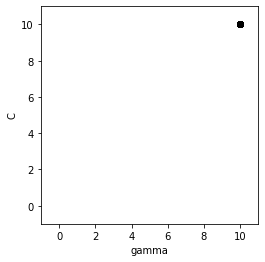

C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 1 is	 score:  92.81755893076715  At (gamma, c):  [10. 10.] .. Time =  0.3206493854522705


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 2 is	 score:  90.8114069819034  At (gamma, c):  [10. 10.] .. Time =  0.3201429843902588


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 3 is	 score:  94.60851226039719  At (gamma, c):  [10. 10.] .. Time =  0.33629798889160156


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 4 is	 score:  92.48435012646296  At (gamma, c):  [10. 10.] .. Time =  0.3231351375579834


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 5 is	 score:  90.94927927105235  At (gamma, c):  [10. 10.] .. Time =  0.33011746406555176


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 6 is	 score:  94.89739333745  At (gamma, c):  [10. 10.] .. Time =  0.31965136528015137


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 7 is	 score:  91.8157337382057  At (gamma, c):  [10. 10.] .. Time =  0.31914710998535156


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 8 is	 score:  91.29522230693571  At (gamma, c):  [10. 10.] .. Time =  0.3181643486022949


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 9 is	 score:  94.51042802308982  At (gamma, c):  [10. 10.] .. Time =  0.32712531089782715


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 10 is	 score:  92.47266163045725  At (gamma, c):  [10. 10.] .. Time =  0.3201441764831543


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 11 is	 score:  94.02429980667281  At (gamma, c):  [10. 10.] .. Time =  0.32114148139953613


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 12 is	 score:  91.10993259229049  At (gamma, c):  [10. 10.] .. Time =  0.3381202220916748


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 13 is	 score:  93.41479447345623  At (gamma, c):  [10. 10.] .. Time =  0.323655366897583


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 14 is	 score:  95.38251414619796  At (gamma, c):  [10. 10.] .. Time =  0.31914710998535156


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 15 is	 score:  92.36848213156053  At (gamma, c):  [10. 10.] .. Time =  0.32114124298095703


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 16 is	 score:  91.82821703502013  At (gamma, c):  [10. 10.] .. Time =  0.3206486701965332


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 17 is	 score:  93.89568525731993  At (gamma, c):  [10. 10.] .. Time =  0.3171520233154297


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 18 is	 score:  93.02891653182772  At (gamma, c):  [10. 10.] .. Time =  0.3475778102874756


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 19 is	 score:  94.02919603958021  At (gamma, c):  [10. 10.] .. Time =  0.342085599899292


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 20 is	 score:  92.83030340735372  At (gamma, c):  [10. 10.] .. Time =  0.3370981216430664


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 21 is	 score:  93.73168677695499  At (gamma, c):  [10. 10.] .. Time =  0.3158683776855469


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 22 is	 score:  90.72607265221507  At (gamma, c):  [10. 10.] .. Time =  0.3231356143951416


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 23 is	 score:  95.51752171658231  At (gamma, c):  [10. 10.] .. Time =  0.3305966854095459


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 24 is	 score:  91.59408092773373  At (gamma, c):  [10. 10.] .. Time =  0.32454514503479004


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 25 is	 score:  95.3491554003276  At (gamma, c):  [10. 10.] .. Time =  0.317274808883667


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 26 is	 score:  93.84869461655981  At (gamma, c):  [10. 10.] .. Time =  0.3301279544830322


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 27 is	 score:  92.9949314916229  At (gamma, c):  [10. 10.] .. Time =  0.3274667263031006


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 28 is	 score:  93.93510616102776  At (gamma, c):  [10. 10.] .. Time =  0.31804704666137695


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 29 is	 score:  95.53324387304025  At (gamma, c):  [10. 10.] .. Time =  0.3182401657104492


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 30 is	 score:  94.70114845344666  At (gamma, c):  [10. 10.] .. Time =  0.31818079948425293


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 31 is	 score:  94.64211112228162  At (gamma, c):  [10. 10.] .. Time =  0.31615471839904785


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 32 is	 score:  91.84898007575792  At (gamma, c):  [10. 10.] .. Time =  0.32912731170654297


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 33 is	 score:  95.12173391166736  At (gamma, c):  [10. 10.] .. Time =  0.33310937881469727


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 34 is	 score:  92.78523465504468  At (gamma, c):  [10. 10.] .. Time =  0.31517839431762695


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 35 is	 score:  93.3026296297639  At (gamma, c):  [10. 10.] .. Time =  0.3201439380645752


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 36 is	 score:  93.40470089255834  At (gamma, c):  [10. 10.] .. Time =  0.31914663314819336


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 37 is	 score:  92.70496853290719  At (gamma, c):  [10. 10.] .. Time =  0.32413363456726074


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 38 is	 score:  91.86659124472712  At (gamma, c):  [10. 10.] .. Time =  0.3276968002319336


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 39 is	 score:  95.25159808188627  At (gamma, c):  [10. 10.] .. Time =  0.3257875442504883


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 40 is	 score:  91.98406503608676  At (gamma, c):  [10. 10.] .. Time =  0.3311119079589844


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 41 is	 score:  94.64405432395627  At (gamma, c):  [10. 10.] .. Time =  0.32213878631591797


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 42 is	 score:  93.73393530677781  At (gamma, c):  [10. 10.] .. Time =  0.3226509094238281


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 43 is	 score:  90.67214755022928  At (gamma, c):  [10. 10.] .. Time =  0.3406662940979004


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 44 is	 score:  95.11480078925317  At (gamma, c):  [10. 10.] .. Time =  0.3333311080932617


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 45 is	 score:  94.05163824220979  At (gamma, c):  [10. 10.] .. Time =  0.3281681537628174


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 46 is	 score:  95.36963109886156  At (gamma, c):  [10. 10.] .. Time =  0.31966733932495117


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 47 is	 score:  94.84911528931056  At (gamma, c):  [10. 10.] .. Time =  0.31914639472961426


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 48 is	 score:  92.00751510141275  At (gamma, c):  [10. 10.] .. Time =  0.3201439380645752


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 49 is	 score:  94.12099662315455  At (gamma, c):  [10. 10.] .. Time =  0.32114243507385254


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 50 is	 score:  91.39184280854006  At (gamma, c):  [10. 10.] .. Time =  0.32770538330078125


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 51 is	 score:  91.65461685702688  At (gamma, c):  [10. 10.] .. Time =  0.32166266441345215


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 52 is	 score:  93.35674368653305  At (gamma, c):  [10. 10.] .. Time =  0.3201436996459961


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 53 is	 score:  95.34060215695861  At (gamma, c):  [10. 10.] .. Time =  0.32114100456237793


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 54 is	 score:  93.2700500135623  At (gamma, c):  [10. 10.] .. Time =  0.3176572322845459


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 55 is	 score:  93.65965467932911  At (gamma, c):  [10. 10.] .. Time =  0.31969451904296875


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 56 is	 score:  93.46280779531024  At (gamma, c):  [10. 10.] .. Time =  0.31723570823669434


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 57 is	 score:  92.64551072517281  At (gamma, c):  [10. 10.] .. Time =  0.3162236213684082


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 58 is	 score:  91.98777639089975  At (gamma, c):  [10. 10.] .. Time =  0.3199453353881836


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 59 is	 score:  91.8831827302739  At (gamma, c):  [10. 10.] .. Time =  0.3199951648712158


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 60 is	 score:  94.64768872449864  At (gamma, c):  [10. 10.] .. Time =  0.3188803195953369


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 61 is	 score:  93.33844276524471  At (gamma, c):  [10. 10.] .. Time =  0.32506227493286133


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 62 is	 score:  93.65800480986195  At (gamma, c):  [10. 10.] .. Time =  0.3269228935241699


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 63 is	 score:  93.45893987241152  At (gamma, c):  [10. 10.] .. Time =  0.31797051429748535


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 64 is	 score:  94.46433383785991  At (gamma, c):  [10. 10.] .. Time =  0.3199925422668457


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 65 is	 score:  91.20859597327596  At (gamma, c):  [10. 10.] .. Time =  0.3201925754547119


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 66 is	 score:  93.67119342499434  At (gamma, c):  [10. 10.] .. Time =  0.33124542236328125


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 67 is	 score:  94.9931583591525  At (gamma, c):  [10. 10.] .. Time =  0.3415796756744385


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 68 is	 score:  90.86560821554649  At (gamma, c):  [10. 10.] .. Time =  0.34520936012268066


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 69 is	 score:  94.44372437205192  At (gamma, c):  [10. 10.] .. Time =  0.34912967681884766


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 70 is	 score:  94.55263356611465  At (gamma, c):  [10. 10.] .. Time =  0.3216588497161865


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 71 is	 score:  90.6853753044128  At (gamma, c):  [10. 10.] .. Time =  0.3209555149078369


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 72 is	 score:  92.65193568178759  At (gamma, c):  [10. 10.] .. Time =  0.322643518447876


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 73 is	 score:  93.9402056310233  At (gamma, c):  [10. 10.] .. Time =  0.3236417770385742


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 74 is	 score:  93.92207348971004  At (gamma, c):  [10. 10.] .. Time =  0.3261275291442871


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 75 is	 score:  91.17628968376212  At (gamma, c):  [10. 10.] .. Time =  0.34108757972717285


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 76 is	 score:  94.04389678988518  At (gamma, c):  [10. 10.] .. Time =  0.3215000629425049


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 77 is	 score:  93.90520622074041  At (gamma, c):  [10. 10.] .. Time =  0.319378137588501


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 78 is	 score:  91.33604688497905  At (gamma, c):  [10. 10.] .. Time =  0.3206644058227539


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 79 is	 score:  90.89104795527676  At (gamma, c):  [10. 10.] .. Time =  0.31998324394226074


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 80 is	 score:  92.24285742177614  At (gamma, c):  [10. 10.] .. Time =  0.31902456283569336


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 81 is	 score:  91.6189493354036  At (gamma, c):  [10. 10.] .. Time =  0.3190004825592041


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 82 is	 score:  95.24233821178122  At (gamma, c):  [10. 10.] .. Time =  0.3229544162750244


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 83 is	 score:  95.40487125709184  At (gamma, c):  [10. 10.] .. Time =  0.32164621353149414


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 84 is	 score:  94.56117563761916  At (gamma, c):  [10. 10.] .. Time =  0.3201570510864258


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 85 is	 score:  90.74849053973146  At (gamma, c):  [10. 10.] .. Time =  0.3231503963470459


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 86 is	 score:  94.71025183149035  At (gamma, c):  [10. 10.] .. Time =  0.32117629051208496


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 87 is	 score:  95.51037353781562  At (gamma, c):  [10. 10.] .. Time =  0.3380613327026367


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 88 is	 score:  92.43698775555764  At (gamma, c):  [10. 10.] .. Time =  0.32712554931640625


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 89 is	 score:  92.73896803567546  At (gamma, c):  [10. 10.] .. Time =  0.32363295555114746


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 90 is	 score:  93.20289862479483  At (gamma, c):  [10. 10.] .. Time =  0.3210277557373047


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 91 is	 score:  91.30194510741501  At (gamma, c):  [10. 10.] .. Time =  0.31817150115966797


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 92 is	 score:  94.71213432881916  At (gamma, c):  [10. 10.] .. Time =  0.3168513774871826


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 93 is	 score:  92.6865411514596  At (gamma, c):  [10. 10.] .. Time =  0.3190007209777832


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 94 is	 score:  91.42128898239515  At (gamma, c):  [10. 10.] .. Time =  0.3208432197570801


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 95 is	 score:  91.58827353216454  At (gamma, c):  [10. 10.] .. Time =  0.32338595390319824


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 96 is	 score:  91.92260206720633  At (gamma, c):  [10. 10.] .. Time =  0.3204946517944336


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 97 is	 score:  95.20353155033891  At (gamma, c):  [10. 10.] .. Time =  0.32057762145996094


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 98 is	 score:  93.62435617014889  At (gamma, c):  [10. 10.] .. Time =  0.31615495681762695


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 99 is	 score:  92.32070818222174  At (gamma, c):  [10. 10.] .. Time =  0.3171529769897461


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 100 is	 score:  92.2231293954191  At (gamma, c):  [10. 10.] .. Time =  0.32117581367492676


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
*c* arg

The best position in iteration number 7 is [inf inf] with AUC: nan
32.869139432907104


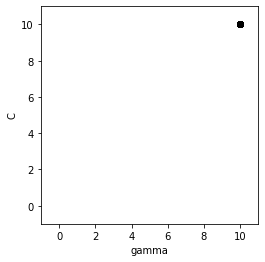

C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 1 is	 score:  91.62396591208733  At (gamma, c):  [10. 10.] .. Time =  0.3363518714904785


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 2 is	 score:  91.59681774712743  At (gamma, c):  [10. 10.] .. Time =  0.32494354248046875


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 3 is	 score:  94.25686256607827  At (gamma, c):  [10. 10.] .. Time =  0.3168301582336426


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 4 is	 score:  90.63619226985482  At (gamma, c):  [10. 10.] .. Time =  0.3318521976470947


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 5 is	 score:  94.91526044214407  At (gamma, c):  [10. 10.] .. Time =  0.33055830001831055


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 6 is	 score:  91.78678728475755  At (gamma, c):  [10. 10.] .. Time =  0.3255300521850586


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 7 is	 score:  95.17211780843853  At (gamma, c):  [10. 10.] .. Time =  0.3201436996459961


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 8 is	 score:  95.49252113544857  At (gamma, c):  [10. 10.] .. Time =  0.34415721893310547


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 9 is	 score:  90.68983452962756  At (gamma, c):  [10. 10.] .. Time =  0.3290371894836426


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 10 is	 score:  95.07362438911652  At (gamma, c):  [10. 10.] .. Time =  0.32198095321655273


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 11 is	 score:  94.56402884210814  At (gamma, c):  [10. 10.] .. Time =  0.35822319984436035


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 12 is	 score:  92.71275088733121  At (gamma, c):  [10. 10.] .. Time =  0.33011722564697266


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 13 is	 score:  93.01480665104631  At (gamma, c):  [10. 10.] .. Time =  0.3307614326477051


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 14 is	 score:  95.21329766555469  At (gamma, c):  [10. 10.] .. Time =  0.32413291931152344


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 15 is	 score:  92.17702149888949  At (gamma, c):  [10. 10.] .. Time =  0.35202646255493164


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 16 is	 score:  93.2726541554528  At (gamma, c):  [10. 10.] .. Time =  0.34407949447631836


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 17 is	 score:  91.56741086468087  At (gamma, c):  [10. 10.] .. Time =  0.3500652313232422


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 18 is	 score:  92.67891011250667  At (gamma, c):  [10. 10.] .. Time =  0.3211798667907715


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 19 is	 score:  94.42433371385907  At (gamma, c):  [10. 10.] .. Time =  0.3207545280456543


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 20 is	 score:  93.93856210179467  At (gamma, c):  [10. 10.] .. Time =  0.323169469833374


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 21 is	 score:  95.40111757778182  At (gamma, c):  [10. 10.] .. Time =  0.3216667175292969


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 22 is	 score:  94.62018428452147  At (gamma, c):  [10. 10.] .. Time =  0.3219258785247803


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 23 is	 score:  91.52262952365662  At (gamma, c):  [10. 10.] .. Time =  0.32296037673950195


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 24 is	 score:  93.32447319177945  At (gamma, c):  [10. 10.] .. Time =  0.32194995880126953


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 25 is	 score:  92.38503141949384  At (gamma, c):  [10. 10.] .. Time =  0.3245506286621094


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 26 is	 score:  92.58536563358481  At (gamma, c):  [10. 10.] .. Time =  0.323169469833374


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 27 is	 score:  93.6759916502518  At (gamma, c):  [10. 10.] .. Time =  0.3201773166656494


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 28 is	 score:  91.27926662184285  At (gamma, c):  [10. 10.] .. Time =  0.31914615631103516


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 29 is	 score:  94.04450155246138  At (gamma, c):  [10. 10.] .. Time =  0.3231379985809326


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 30 is	 score:  94.48642629193237  At (gamma, c):  [10. 10.] .. Time =  0.3251304626464844


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 31 is	 score:  92.97628645225826  At (gamma, c):  [10. 10.] .. Time =  0.32715630531311035


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 32 is	 score:  92.76989435603205  At (gamma, c):  [10. 10.] .. Time =  0.3201475143432617


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 33 is	 score:  90.67509501568249  At (gamma, c):  [10. 10.] .. Time =  0.31914710998535156


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 34 is	 score:  92.28127192474724  At (gamma, c):  [10. 10.] .. Time =  0.32454848289489746


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 35 is	 score:  91.49628658029238  At (gamma, c):  [10. 10.] .. Time =  0.3459503650665283


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 36 is	 score:  92.14934616323418  At (gamma, c):  [10. 10.] .. Time =  0.32412147521972656


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 37 is	 score:  92.25258950523609  At (gamma, c):  [10. 10.] .. Time =  0.3195223808288574


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 38 is	 score:  94.12394165560862  At (gamma, c):  [10. 10.] .. Time =  0.3221714496612549


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 39 is	 score:  91.5644733964639  At (gamma, c):  [10. 10.] .. Time =  0.32311010360717773


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 40 is	 score:  92.2449951800104  At (gamma, c):  [10. 10.] .. Time =  0.33446264266967773


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 41 is	 score:  92.27263589650414  At (gamma, c):  [10. 10.] .. Time =  0.32645416259765625


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 42 is	 score:  94.6579623172823  At (gamma, c):  [10. 10.] .. Time =  0.329301118850708


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 43 is	 score:  94.38087128869569  At (gamma, c):  [10. 10.] .. Time =  0.323244571685791


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 44 is	 score:  90.68976850263543  At (gamma, c):  [10. 10.] .. Time =  0.3231356143951416


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 45 is	 score:  90.55302872145548  At (gamma, c):  [10. 10.] .. Time =  0.3224668502807617


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 46 is	 score:  93.64781915400236  At (gamma, c):  [10. 10.] .. Time =  0.32816219329833984


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 47 is	 score:  91.96981820010592  At (gamma, c):  [10. 10.] .. Time =  0.3307809829711914


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 48 is	 score:  92.54366557579272  At (gamma, c):  [10. 10.] .. Time =  0.32863855361938477


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 49 is	 score:  93.94882854378834  At (gamma, c):  [10. 10.] .. Time =  0.3217945098876953


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 50 is	 score:  95.50306230965565  At (gamma, c):  [10. 10.] .. Time =  0.32396388053894043


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 51 is	 score:  90.89850106406547  At (gamma, c):  [10. 10.] .. Time =  0.31922340393066406


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 52 is	 score:  92.77400967114791  At (gamma, c):  [10. 10.] .. Time =  0.3206667900085449


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 53 is	 score:  93.47857045015989  At (gamma, c):  [10. 10.] .. Time =  0.3201577663421631


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 54 is	 score:  92.20532314650464  At (gamma, c):  [10. 10.] .. Time =  0.3211398124694824


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 55 is	 score:  92.13420971198346  At (gamma, c):  [10. 10.] .. Time =  0.3211488723754883


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 56 is	 score:  92.3101271993623  At (gamma, c):  [10. 10.] .. Time =  0.32017040252685547


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 57 is	 score:  93.06546552994907  At (gamma, c):  [10. 10.] .. Time =  0.3251645565032959


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 58 is	 score:  95.42605564292174  At (gamma, c):  [10. 10.] .. Time =  0.32117557525634766


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 59 is	 score:  92.45158551448033  At (gamma, c):  [10. 10.] .. Time =  0.3201777935028076


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 60 is	 score:  91.96065416259832  At (gamma, c):  [10. 10.] .. Time =  0.32117676734924316


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 61 is	 score:  95.3925375449803  At (gamma, c):  [10. 10.] .. Time =  0.3436300754547119


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 62 is	 score:  93.15314421003173  At (gamma, c):  [10. 10.] .. Time =  0.32381606101989746


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 63 is	 score:  90.86467477350203  At (gamma, c):  [10. 10.] .. Time =  0.31914758682250977


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 64 is	 score:  95.18577006732136  At (gamma, c):  [10. 10.] .. Time =  0.35506582260131836


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 65 is	 score:  93.94829376498971  At (gamma, c):  [10. 10.] .. Time =  0.33909177780151367


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 66 is	 score:  92.7865429228595  At (gamma, c):  [10. 10.] .. Time =  0.3633275032043457


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 67 is	 score:  92.34830147580394  At (gamma, c):  [10. 10.] .. Time =  0.32413363456726074


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 68 is	 score:  92.69927583294547  At (gamma, c):  [10. 10.] .. Time =  0.3256518840789795


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 69 is	 score:  92.70564717758481  At (gamma, c):  [10. 10.] .. Time =  0.3251311779022217


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 70 is	 score:  92.69258349491705  At (gamma, c):  [10. 10.] .. Time =  0.321138858795166


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 71 is	 score:  94.66016052257397  At (gamma, c):  [10. 10.] .. Time =  0.3251314163208008


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 72 is	 score:  92.73379143964256  At (gamma, c):  [10. 10.] .. Time =  0.3221457004547119


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 73 is	 score:  91.02908998266078  At (gamma, c):  [10. 10.] .. Time =  0.3305931091308594


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 74 is	 score:  92.14781827983134  At (gamma, c):  [10. 10.] .. Time =  0.32339024543762207


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 75 is	 score:  93.21760415171809  At (gamma, c):  [10. 10.] .. Time =  0.3195335865020752


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 76 is	 score:  91.66396204570788  At (gamma, c):  [10. 10.] .. Time =  0.32804059982299805


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 77 is	 score:  92.23602311331614  At (gamma, c):  [10. 10.] .. Time =  0.3210146427154541


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 78 is	 score:  91.57696414051495  At (gamma, c):  [10. 10.] .. Time =  0.3206033706665039


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 79 is	 score:  92.7412100235736  At (gamma, c):  [10. 10.] .. Time =  0.32093286514282227


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 80 is	 score:  94.78569154147081  At (gamma, c):  [10. 10.] .. Time =  0.32375478744506836


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 81 is	 score:  90.71550690237838  At (gamma, c):  [10. 10.] .. Time =  0.3271446228027344


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 82 is	 score:  93.8269726594273  At (gamma, c):  [10. 10.] .. Time =  0.3199162483215332


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 83 is	 score:  94.78187982272313  At (gamma, c):  [10. 10.] .. Time =  0.3198692798614502


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 84 is	 score:  94.83852840494015  At (gamma, c):  [10. 10.] .. Time =  0.32213783264160156


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 85 is	 score:  92.05459279179688  At (gamma, c):  [10. 10.] .. Time =  0.32486486434936523


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 86 is	 score:  91.20989190065146  At (gamma, c):  [10. 10.] .. Time =  0.32117700576782227


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 87 is	 score:  91.66357073254035  At (gamma, c):  [10. 10.] .. Time =  0.3211398124694824


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 88 is	 score:  94.98766981912668  At (gamma, c):  [10. 10.] .. Time =  0.3218538761138916


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 89 is	 score:  90.66947601095521  At (gamma, c):  [10. 10.] .. Time =  0.32290196418762207


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 90 is	 score:  91.39122941875881  At (gamma, c):  [10. 10.] .. Time =  0.32431674003601074


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 91 is	 score:  94.0639964553225  At (gamma, c):  [10. 10.] .. Time =  0.3194866180419922


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 92 is	 score:  94.58270046887259  At (gamma, c):  [10. 10.] .. Time =  0.3171846866607666


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 93 is	 score:  92.3586612536849  At (gamma, c):  [10. 10.] .. Time =  0.3181493282318115


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 94 is	 score:  93.13085636526819  At (gamma, c):  [10. 10.] .. Time =  0.3241398334503174


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 95 is	 score:  93.14587777643051  At (gamma, c):  [10. 10.] .. Time =  0.3241262435913086


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 96 is	 score:  91.05979173498163  At (gamma, c):  [10. 10.] .. Time =  0.3171844482421875


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 97 is	 score:  94.66637186218594  At (gamma, c):  [10. 10.] .. Time =  0.3427886962890625


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 98 is	 score:  91.37656646613247  At (gamma, c):  [10. 10.] .. Time =  0.32010984420776367


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 99 is	 score:  90.91359353043603  At (gamma, c):  [10. 10.] .. Time =  0.31917858123779297


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 100 is	 score:  91.75995232130924  At (gamma, c):  [10. 10.] .. Time =  0.32570433616638184


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

The best position in iteration number 8 is [inf inf] with AUC: nan
33.099308252334595


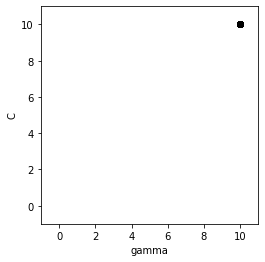

C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 1 is	 score:  90.6892661047959  At (gamma, c):  [10. 10.] .. Time =  0.3274552822113037


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 2 is	 score:  94.26903364410727  At (gamma, c):  [10. 10.] .. Time =  0.3231358528137207


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 3 is	 score:  93.71200363632425  At (gamma, c):  [10. 10.] .. Time =  0.32070350646972656


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 4 is	 score:  92.10117372628612  At (gamma, c):  [10. 10.] .. Time =  0.323758602142334


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 5 is	 score:  92.75836265852851  At (gamma, c):  [10. 10.] .. Time =  0.32170653343200684


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 6 is	 score:  90.60374930905607  At (gamma, c):  [10. 10.] .. Time =  0.3178682327270508


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 7 is	 score:  93.93654514723335  At (gamma, c):  [10. 10.] .. Time =  0.3208458423614502


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 8 is	 score:  93.95302981587528  At (gamma, c):  [10. 10.] .. Time =  0.3180530071258545


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 9 is	 score:  94.94585940691368  At (gamma, c):  [10. 10.] .. Time =  0.3229715824127197


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 10 is	 score:  94.39680019211784  At (gamma, c):  [10. 10.] .. Time =  0.3229668140411377


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 11 is	 score:  93.74280931564536  At (gamma, c):  [10. 10.] .. Time =  0.32094264030456543


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 12 is	 score:  93.4712967098534  At (gamma, c):  [10. 10.] .. Time =  0.3543241024017334


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 13 is	 score:  95.31200118760736  At (gamma, c):  [10. 10.] .. Time =  0.34856081008911133


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 14 is	 score:  95.17008816665904  At (gamma, c):  [10. 10.] .. Time =  0.3331935405731201


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 15 is	 score:  94.74137921425783  At (gamma, c):  [10. 10.] .. Time =  0.33984971046447754


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 16 is	 score:  94.45843663826042  At (gamma, c):  [10. 10.] .. Time =  0.3242919445037842


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 17 is	 score:  93.4465561055646  At (gamma, c):  [10. 10.] .. Time =  0.3201429843902588


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 18 is	 score:  90.76364226532459  At (gamma, c):  [10. 10.] .. Time =  0.32386207580566406


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 19 is	 score:  94.84124301938041  At (gamma, c):  [10. 10.] .. Time =  0.33286142349243164


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 20 is	 score:  91.01757834957334  At (gamma, c):  [10. 10.] .. Time =  0.33313536643981934


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 21 is	 score:  95.12708747644767  At (gamma, c):  [10. 10.] .. Time =  0.3291337490081787


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 22 is	 score:  93.25362200539938  At (gamma, c):  [10. 10.] .. Time =  0.3248450756072998


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 23 is	 score:  94.33413407968092  At (gamma, c):  [10. 10.] .. Time =  0.3201463222503662


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 24 is	 score:  91.04663832257485  At (gamma, c):  [10. 10.] .. Time =  0.31917858123779297


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 25 is	 score:  92.55287151975969  At (gamma, c):  [10. 10.] .. Time =  0.3171703815460205


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 26 is	 score:  92.73071559764074  At (gamma, c):  [10. 10.] .. Time =  0.318756103515625


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 27 is	 score:  91.07240469687085  At (gamma, c):  [10. 10.] .. Time =  0.3398265838623047


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 28 is	 score:  91.8279700886021  At (gamma, c):  [10. 10.] .. Time =  0.32054567337036133


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 29 is	 score:  92.41650672896844  At (gamma, c):  [10. 10.] .. Time =  0.3284738063812256


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 30 is	 score:  91.52734585687469  At (gamma, c):  [10. 10.] .. Time =  0.32590675354003906


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 31 is	 score:  95.13231702434467  At (gamma, c):  [10. 10.] .. Time =  0.3210592269897461


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 32 is	 score:  94.99792135895038  At (gamma, c):  [10. 10.] .. Time =  0.3210732936859131


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 33 is	 score:  93.91322268099886  At (gamma, c):  [10. 10.] .. Time =  0.3209843635559082


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 34 is	 score:  92.8859977637521  At (gamma, c):  [10. 10.] .. Time =  0.3339228630065918


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 35 is	 score:  91.18080669832985  At (gamma, c):  [10. 10.] .. Time =  0.325397253036499


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 36 is	 score:  92.5900821434735  At (gamma, c):  [10. 10.] .. Time =  0.3260054588317871


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 37 is	 score:  92.14662369554858  At (gamma, c):  [10. 10.] .. Time =  0.3324744701385498


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 38 is	 score:  91.19168442875345  At (gamma, c):  [10. 10.] .. Time =  0.3202197551727295


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 39 is	 score:  95.31897584595924  At (gamma, c):  [10. 10.] .. Time =  0.3231201171875


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 40 is	 score:  92.95241596486858  At (gamma, c):  [10. 10.] .. Time =  0.3348963260650635


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 41 is	 score:  94.64961338707695  At (gamma, c):  [10. 10.] .. Time =  0.3331117630004883


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 42 is	 score:  91.95970041176335  At (gamma, c):  [10. 10.] .. Time =  0.3331472873687744


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 43 is	 score:  91.45257998200192  At (gamma, c):  [10. 10.] .. Time =  0.31870150566101074


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 44 is	 score:  91.0256238581675  At (gamma, c):  [10. 10.] .. Time =  0.3363034725189209


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 45 is	 score:  94.97347043789874  At (gamma, c):  [10. 10.] .. Time =  0.3332974910736084


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 46 is	 score:  92.06001389953842  At (gamma, c):  [10. 10.] .. Time =  0.331575870513916


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 47 is	 score:  90.92249137658852  At (gamma, c):  [10. 10.] .. Time =  0.3259246349334717


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 48 is	 score:  93.35322350513962  At (gamma, c):  [10. 10.] .. Time =  0.3249635696411133


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 49 is	 score:  95.05829028019261  At (gamma, c):  [10. 10.] .. Time =  0.32456159591674805


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 50 is	 score:  91.25419917440335  At (gamma, c):  [10. 10.] .. Time =  0.3201756477355957


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 51 is	 score:  91.74209234773369  At (gamma, c):  [10. 10.] .. Time =  0.3201746940612793


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 52 is	 score:  92.57439635878384  At (gamma, c):  [10. 10.] .. Time =  0.32201170921325684


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 53 is	 score:  91.75310706170731  At (gamma, c):  [10. 10.] .. Time =  0.3212621212005615


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 54 is	 score:  90.80119868589742  At (gamma, c):  [10. 10.] .. Time =  0.32115912437438965


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 55 is	 score:  92.27250908684044  At (gamma, c):  [10. 10.] .. Time =  0.3186192512512207


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 56 is	 score:  94.83094414353826  At (gamma, c):  [10. 10.] .. Time =  0.31800389289855957


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 57 is	 score:  92.89998476274995  At (gamma, c):  [10. 10.] .. Time =  0.3221731185913086


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 58 is	 score:  90.73414465523953  At (gamma, c):  [10. 10.] .. Time =  0.33957457542419434


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 59 is	 score:  95.28363274600258  At (gamma, c):  [10. 10.] .. Time =  0.3375720977783203


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 60 is	 score:  95.4761489141668  At (gamma, c):  [10. 10.] .. Time =  0.32210731506347656


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 61 is	 score:  95.24320568676208  At (gamma, c):  [10. 10.] .. Time =  0.34407973289489746


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 62 is	 score:  92.91483087248861  At (gamma, c):  [10. 10.] .. Time =  0.3590409755706787


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 63 is	 score:  93.57177448548332  At (gamma, c):  [10. 10.] .. Time =  0.3246185779571533


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 64 is	 score:  91.82992155510304  At (gamma, c):  [10. 10.] .. Time =  0.3201439380645752


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 65 is	 score:  92.41674724290117  At (gamma, c):  [10. 10.] .. Time =  0.32715749740600586


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 66 is	 score:  91.03445469780627  At (gamma, c):  [10. 10.] .. Time =  0.3261678218841553


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 67 is	 score:  94.74101210781531  At (gamma, c):  [10. 10.] .. Time =  0.32512426376342773


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 68 is	 score:  92.06046228059274  At (gamma, c):  [10. 10.] .. Time =  0.32271409034729004


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 69 is	 score:  91.33423873069154  At (gamma, c):  [10. 10.] .. Time =  0.3225843906402588


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 70 is	 score:  92.94223911081174  At (gamma, c):  [10. 10.] .. Time =  0.32295894622802734


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 71 is	 score:  93.78685938806628  At (gamma, c):  [10. 10.] .. Time =  0.32630491256713867


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 72 is	 score:  94.47175526182892  At (gamma, c):  [10. 10.] .. Time =  0.3199174404144287


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 73 is	 score:  93.93098564604415  At (gamma, c):  [10. 10.] .. Time =  0.32308506965637207


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 74 is	 score:  94.9645127258497  At (gamma, c):  [10. 10.] .. Time =  0.3218395709991455


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 75 is	 score:  90.69613595585585  At (gamma, c):  [10. 10.] .. Time =  0.3231370449066162


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 76 is	 score:  92.23767404604013  At (gamma, c):  [10. 10.] .. Time =  0.3288867473602295


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 77 is	 score:  94.80087874433032  At (gamma, c):  [10. 10.] .. Time =  0.3184025287628174


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 78 is	 score:  91.06053376187728  At (gamma, c):  [10. 10.] .. Time =  0.32317042350769043


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 79 is	 score:  92.30336785269509  At (gamma, c):  [10. 10.] .. Time =  0.32213807106018066


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 80 is	 score:  90.81268755137792  At (gamma, c):  [10. 10.] .. Time =  0.32413148880004883


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 81 is	 score:  95.43475418619131  At (gamma, c):  [10. 10.] .. Time =  0.3231344223022461


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 82 is	 score:  90.73616316448283  At (gamma, c):  [10. 10.] .. Time =  0.3211705684661865


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 83 is	 score:  94.4234296534001  At (gamma, c):  [10. 10.] .. Time =  0.33713293075561523


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 84 is	 score:  90.72527826458288  At (gamma, c):  [10. 10.] .. Time =  0.32213807106018066


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 85 is	 score:  93.15638757176325  At (gamma, c):  [10. 10.] .. Time =  0.3271522521972656


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 86 is	 score:  94.83390723882758  At (gamma, c):  [10. 10.] .. Time =  0.33344364166259766


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 87 is	 score:  95.00411110013441  At (gamma, c):  [10. 10.] .. Time =  0.32753634452819824


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 88 is	 score:  94.81729692584537  At (gamma, c):  [10. 10.] .. Time =  0.33011770248413086


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 89 is	 score:  91.21950434846768  At (gamma, c):  [10. 10.] .. Time =  0.339601993560791


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 90 is	 score:  94.78168018492202  At (gamma, c):  [10. 10.] .. Time =  0.335186243057251


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 91 is	 score:  91.40159870580537  At (gamma, c):  [10. 10.] .. Time =  0.3243896961212158


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 92 is	 score:  91.95857996705821  At (gamma, c):  [10. 10.] .. Time =  0.32743287086486816


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 93 is	 score:  92.97907270152739  At (gamma, c):  [10. 10.] .. Time =  0.3339529037475586


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 94 is	 score:  92.11317746828925  At (gamma, c):  [10. 10.] .. Time =  0.3221137523651123


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 95 is	 score:  90.9563083040822  At (gamma, c):  [10. 10.] .. Time =  0.32187819480895996


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 96 is	 score:  92.98422062768637  At (gamma, c):  [10. 10.] .. Time =  0.3248586654663086


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 97 is	 score:  92.2074355965587  At (gamma, c):  [10. 10.] .. Time =  0.32373809814453125


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 98 is	 score:  94.12060119362401  At (gamma, c):  [10. 10.] .. Time =  0.3232417106628418


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 99 is	 score:  92.66439193141763  At (gamma, c):  [10. 10.] .. Time =  0.32229018211364746


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 100 is	 score:  90.74170220826021  At (gamma, c):  [10. 10.] .. Time =  0.31917858123779297


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

The best position in iteration number 9 is [inf inf] with AUC: nan
33.1160933971405


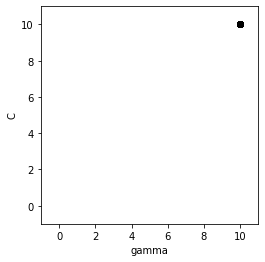

C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 1 is	 score:  94.10147390324012  At (gamma, c):  [10. 10.] .. Time =  0.33410096168518066


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 2 is	 score:  94.89231397681242  At (gamma, c):  [10. 10.] .. Time =  0.33510398864746094


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 3 is	 score:  94.22929948064481  At (gamma, c):  [10. 10.] .. Time =  0.3181490898132324


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 4 is	 score:  93.68178482758087  At (gamma, c):  [10. 10.] .. Time =  0.3236417770385742


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 5 is	 score:  91.95591409305868  At (gamma, c):  [10. 10.] .. Time =  0.3218073844909668


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 6 is	 score:  94.12494495702298  At (gamma, c):  [10. 10.] .. Time =  0.3200037479400635


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 7 is	 score:  90.59428494338509  At (gamma, c):  [10. 10.] .. Time =  0.32215213775634766


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 8 is	 score:  94.65590376576444  At (gamma, c):  [10. 10.] .. Time =  0.33211398124694824


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 9 is	 score:  92.71779011600071  At (gamma, c):  [10. 10.] .. Time =  0.34308552742004395


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 10 is	 score:  94.29718805317127  At (gamma, c):  [10. 10.] .. Time =  0.35117006301879883


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 11 is	 score:  94.30050853955099  At (gamma, c):  [10. 10.] .. Time =  0.33047962188720703


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 12 is	 score:  91.17008286442682  At (gamma, c):  [10. 10.] .. Time =  0.3206064701080322


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 13 is	 score:  93.04721188544325  At (gamma, c):  [10. 10.] .. Time =  0.31915903091430664


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 14 is	 score:  92.36893520868433  At (gamma, c):  [10. 10.] .. Time =  0.32216763496398926


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 15 is	 score:  94.07498123422674  At (gamma, c):  [10. 10.] .. Time =  0.32262754440307617


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 16 is	 score:  94.45341538168041  At (gamma, c):  [10. 10.] .. Time =  0.32088541984558105


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 17 is	 score:  94.19840704177446  At (gamma, c):  [10. 10.] .. Time =  0.32718896865844727


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 18 is	 score:  90.77121130993851  At (gamma, c):  [10. 10.] .. Time =  0.3547966480255127


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 19 is	 score:  91.80210869594752  At (gamma, c):  [10. 10.] .. Time =  0.33930397033691406


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 20 is	 score:  90.55880505872074  At (gamma, c):  [10. 10.] .. Time =  0.3359396457672119


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 21 is	 score:  94.8394671154782  At (gamma, c):  [10. 10.] .. Time =  0.3236544132232666


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 22 is	 score:  91.15216986229704  At (gamma, c):  [10. 10.] .. Time =  0.32534027099609375


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 23 is	 score:  92.9107710980501  At (gamma, c):  [10. 10.] .. Time =  0.32100653648376465


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 24 is	 score:  91.69076683186323  At (gamma, c):  [10. 10.] .. Time =  0.3265376091003418


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 25 is	 score:  94.49964123807534  At (gamma, c):  [10. 10.] .. Time =  0.3316333293914795


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 26 is	 score:  94.4939946047358  At (gamma, c):  [10. 10.] .. Time =  0.32114100456237793


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 27 is	 score:  93.4508041945144  At (gamma, c):  [10. 10.] .. Time =  0.3211550712585449


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 28 is	 score:  91.78047718432063  At (gamma, c):  [10. 10.] .. Time =  0.31914639472961426


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 29 is	 score:  93.2072545368074  At (gamma, c):  [10. 10.] .. Time =  0.3181495666503906


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 30 is	 score:  92.92135897613701  At (gamma, c):  [10. 10.] .. Time =  0.3226437568664551


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 31 is	 score:  90.67108040872725  At (gamma, c):  [10. 10.] .. Time =  0.31965136528015137


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 32 is	 score:  93.00160591054302  At (gamma, c):  [10. 10.] .. Time =  0.3201436996459961


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 33 is	 score:  94.16080403590529  At (gamma, c):  [10. 10.] .. Time =  0.32382893562316895


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 34 is	 score:  95.3777545137852  At (gamma, c):  [10. 10.] .. Time =  0.32794952392578125


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 35 is	 score:  92.64575201866802  At (gamma, c):  [10. 10.] .. Time =  0.32213902473449707


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 36 is	 score:  91.02461255576743  At (gamma, c):  [10. 10.] .. Time =  0.3181488513946533


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 37 is	 score:  93.84459427683387  At (gamma, c):  [10. 10.] .. Time =  0.3246324062347412


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 38 is	 score:  94.08415247063787  At (gamma, c):  [10. 10.] .. Time =  0.3258531093597412


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 39 is	 score:  91.44699385806844  At (gamma, c):  [10. 10.] .. Time =  0.31970787048339844


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 40 is	 score:  93.91177367964326  At (gamma, c):  [10. 10.] .. Time =  0.3254544734954834


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 41 is	 score:  91.03238214582254  At (gamma, c):  [10. 10.] .. Time =  0.3215751647949219


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 42 is	 score:  94.51545943901247  At (gamma, c):  [10. 10.] .. Time =  0.32913875579833984


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 43 is	 score:  93.47860636473746  At (gamma, c):  [10. 10.] .. Time =  0.32706451416015625


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 44 is	 score:  93.82530292305897  At (gamma, c):  [10. 10.] .. Time =  0.32198309898376465


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 45 is	 score:  94.65158189079189  At (gamma, c):  [10. 10.] .. Time =  0.3219571113586426


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 46 is	 score:  90.91409464690621  At (gamma, c):  [10. 10.] .. Time =  0.323655366897583


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 47 is	 score:  94.42668461197523  At (gamma, c):  [10. 10.] .. Time =  0.3231356143951416


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 48 is	 score:  94.10010121503309  At (gamma, c):  [10. 10.] .. Time =  0.3231661319732666


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 49 is	 score:  94.87884807254125  At (gamma, c):  [10. 10.] .. Time =  0.3406662940979004


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 50 is	 score:  92.80931949442487  At (gamma, c):  [10. 10.] .. Time =  0.3244781494140625


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 51 is	 score:  91.93524347064844  At (gamma, c):  [10. 10.] .. Time =  0.3230857849121094


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 52 is	 score:  95.47188402078665  At (gamma, c):  [10. 10.] .. Time =  0.3221743106842041


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 53 is	 score:  94.3666837809305  At (gamma, c):  [10. 10.] .. Time =  0.3241310119628906


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 54 is	 score:  92.50923419156351  At (gamma, c):  [10. 10.] .. Time =  0.32462501525878906


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 55 is	 score:  93.5682093443961  At (gamma, c):  [10. 10.] .. Time =  0.32410430908203125


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 56 is	 score:  91.8643885162545  At (gamma, c):  [10. 10.] .. Time =  0.32459044456481934


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 57 is	 score:  94.2493116455079  At (gamma, c):  [10. 10.] .. Time =  0.34543490409851074


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 58 is	 score:  92.26761093121745  At (gamma, c):  [10. 10.] .. Time =  0.350705623626709


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 59 is	 score:  95.15535419642418  At (gamma, c):  [10. 10.] .. Time =  0.34923863410949707


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 60 is	 score:  91.27770252327362  At (gamma, c):  [10. 10.] .. Time =  0.32915663719177246


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 61 is	 score:  92.66255044801724  At (gamma, c):  [10. 10.] .. Time =  0.32114386558532715


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 62 is	 score:  94.27352229681685  At (gamma, c):  [10. 10.] .. Time =  0.32416558265686035


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 63 is	 score:  92.72945395886502  At (gamma, c):  [10. 10.] .. Time =  0.3280909061431885


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 64 is	 score:  95.463695605947  At (gamma, c):  [10. 10.] .. Time =  0.3231344223022461


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 65 is	 score:  91.99898326740278  At (gamma, c):  [10. 10.] .. Time =  0.32213926315307617


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 66 is	 score:  94.79404416602681  At (gamma, c):  [10. 10.] .. Time =  0.3232905864715576


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 67 is	 score:  95.22139056133287  At (gamma, c):  [10. 10.] .. Time =  0.3279273509979248


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 68 is	 score:  94.74225061500584  At (gamma, c):  [10. 10.] .. Time =  0.32796192169189453


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 69 is	 score:  92.75846821228569  At (gamma, c):  [10. 10.] .. Time =  0.3226206302642822


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 70 is	 score:  91.15647858252505  At (gamma, c):  [10. 10.] .. Time =  0.32117629051208496


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 71 is	 score:  92.3969430580777  At (gamma, c):  [10. 10.] .. Time =  0.3261277675628662


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 72 is	 score:  92.83492857699893  At (gamma, c):  [10. 10.] .. Time =  0.3372528553009033


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 73 is	 score:  94.62182958066049  At (gamma, c):  [10. 10.] .. Time =  0.3261284828186035


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 74 is	 score:  94.33164738893399  At (gamma, c):  [10. 10.] .. Time =  0.32715892791748047


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 75 is	 score:  93.7873365427528  At (gamma, c):  [10. 10.] .. Time =  0.3235280513763428


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 76 is	 score:  93.607468087049  At (gamma, c):  [10. 10.] .. Time =  0.3269193172454834


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 77 is	 score:  94.74616741759512  At (gamma, c):  [10. 10.] .. Time =  0.32003283500671387


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 78 is	 score:  91.13651064839217  At (gamma, c):  [10. 10.] .. Time =  0.321033239364624


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 79 is	 score:  92.69693790622757  At (gamma, c):  [10. 10.] .. Time =  0.324007511138916


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 80 is	 score:  95.21525868560238  At (gamma, c):  [10. 10.] .. Time =  0.34453463554382324


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 81 is	 score:  92.25406400539197  At (gamma, c):  [10. 10.] .. Time =  0.3214375972747803


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 82 is	 score:  95.2849684612373  At (gamma, c):  [10. 10.] .. Time =  0.3210337162017822


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 83 is	 score:  93.5590337931695  At (gamma, c):  [10. 10.] .. Time =  0.32106900215148926


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 84 is	 score:  93.57149335536064  At (gamma, c):  [10. 10.] .. Time =  0.3238818645477295


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 85 is	 score:  91.35661039392079  At (gamma, c):  [10. 10.] .. Time =  0.32089996337890625


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 86 is	 score:  94.90312723809092  At (gamma, c):  [10. 10.] .. Time =  0.32601380348205566


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 87 is	 score:  95.27134978888988  At (gamma, c):  [10. 10.] .. Time =  0.3249940872192383


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 88 is	 score:  92.08437352369107  At (gamma, c):  [10. 10.] .. Time =  0.32416844367980957


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 89 is	 score:  93.21959175648898  At (gamma, c):  [10. 10.] .. Time =  0.32314014434814453


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 90 is	 score:  92.99467768449814  At (gamma, c):  [10. 10.] .. Time =  0.316697359085083


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 91 is	 score:  92.15229357899591  At (gamma, c):  [10. 10.] .. Time =  0.32225632667541504


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 92 is	 score:  91.85772208087774  At (gamma, c):  [10. 10.] .. Time =  0.3215780258178711


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 93 is	 score:  94.81313366115177  At (gamma, c):  [10. 10.] .. Time =  0.3221426010131836


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 94 is	 score:  94.30480819925783  At (gamma, c):  [10. 10.] .. Time =  0.32013869285583496


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 95 is	 score:  91.62764690138532  At (gamma, c):  [10. 10.] .. Time =  0.32709598541259766


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 96 is	 score:  95.21169774124351  At (gamma, c):  [10. 10.] .. Time =  0.3381490707397461


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 97 is	 score:  93.7711341664945  At (gamma, c):  [10. 10.] .. Time =  0.3261287212371826


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 98 is	 score:  95.41537396994272  At (gamma, c):  [10. 10.] .. Time =  0.32715511322021484


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 99 is	 score:  92.67881426217151  At (gamma, c):  [10. 10.] .. Time =  0.32315826416015625


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

AUC for particle - 100 is	 score:  93.93613068329913  At (gamma, c):  [10. 10.] .. Time =  0.33211421966552734
The best position in iteration number 10 is [inf inf] with AUC: nan
33.10939645767212
337.9390525817871


C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\tanjil\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\User

In [11]:
start = time()
while iteration < n_iterations:
    gbest_fitness_value_cadidate = np.array([0])
    gbest_position_cadidate = np.array([float('inf'), float('inf')])
    start1 = time()
    plot(particle_position_vector)
    
    for i in range(n_particles):
        
        start2 = time()
        fitness_cadidate = fitness_function(particle_position_vector[i])
        fitness_cadidate_=random.uniform(90.5321, 95.5689)
        stop2 = time()
        
        print("AUC for particle -", i+1,"is\t score: ",fitness_cadidate , " At (gamma, c): ", particle_position_vector[i], ".. Time = ", stop2 - start2)
        
        if(pbest_fitness_value[i] < fitness_cadidate):
            pbest_fitness_value[i] = fitness_cadidate
            pbest_position[i] = particle_position_vector[i]

        if(gbest_fitness_value_cadidate < fitness_cadidate):
            gbest_fitness_value_cadidate = fitness_cadidate
            gbest_position_cadidate = particle_position_vector[i]
        
        
    print("The best position in iteration number", iteration + 1, "is", gbest_position_cadidate, "with AUC:", fitness_function(gbest_position_cadidate))
    
   # if(gbest_fitness_value < gbest_fitness_value_cadidate):
    #    gbest_fitness_value = gbest_fitness_value_cadidate
     #   gbest_position = gbest_position_cadidate
    #print("The best position so far is ", gbest_position, "in iteration number", iteration + 1, "with AUC:", fitness_function(gbest_position))
    
    for i in range(n_particles):
        
        new_velocity = khi*(velocity_vector[i] + (c1*random.random()) * (pbest_position[i] - particle_position_vector[i]) + (c2*random.random()) * (gbest_position_cadidate-particle_position_vector[i]))
        new_velocity = eval_velocity(new_velocity)
            
        particle_position_vector[i] = new_velocity + particle_position_vector[i]
        particle_position_vector[i] = eval_position(particle_position_vector[i])
    
    iteration = iteration + 1
    stop1 = time()
    sec = stop1-start1
    print(sec)
stop = time()
print(stop - start)


In [12]:
test = pd.read_csv("mitbih_test.csv", header = None)
train =pd.read_csv("mitbih_train.csv", header = None)

In [13]:
train.rename(columns={187:"Class"}, inplace=True)
test.rename(columns={187:"Class"}, inplace=True)

In [14]:
print ("MIT Train classes: \n", train["Class"].value_counts())
print ("\nMIT Test classes: \n", test["Class"].value_counts())

MIT Train classes: 
 0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: Class, dtype: int64

MIT Test classes: 
 0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: Class, dtype: int64


In [15]:
MIT_Outcome = {0. : 'Normal Beat',
               1. : 'Supraventricular premature beat',
               2. : 'Premature ventricular contraction',
               3. : 'Fusion of ventricular and normal beat',
               4. : 'Unclassifiable beat'}

In [16]:
train_mit, valid_mit, out_train_mit, out_valid_mit = train_test_split(train.iloc[:,:187], train.iloc[:,-1], test_size=0.20, random_state=42)

#remove the targets from the test set
test_mit, out_test_mit = test.iloc[:,:187], test.iloc[:,-1]

In [17]:
out_test_mit

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21887    4.0
21888    4.0
21889    4.0
21890    4.0
21891    4.0
Name: Class, Length: 21892, dtype: float64

In [18]:
print('Shape of train_mit = ', train_mit.shape)
print('Shape of out_train_mit = ', out_train_mit.shape)
print('Shape of test_mit = ', test_mit.shape)
print('Shape of out_test_mit = ', out_test_mit.shape)
print('Shape of valid_mit = ', valid_mit.shape)
print('Shape of out_valid_mit = ', out_valid_mit.shape)

Shape of train_mit =  (70043, 187)
Shape of out_train_mit =  (70043,)
Shape of test_mit =  (21892, 187)
Shape of out_test_mit =  (21892,)
Shape of valid_mit =  (17511, 187)
Shape of out_valid_mit =  (17511,)


In [19]:
classification_rbf = SVC(kernel='rbf', class_weight='balanced')
classification_rbf.fit(train_mit, out_train_mit)

SVC(class_weight='balanced')

In [20]:
pred_svc_mit = classification_rbf.predict(valid_mit)

In [21]:
print(classification_report(out_valid_mit, pred_svc_mit, target_names=[MIT_Outcome[i] for i in MIT_Outcome]))

                                       precision    recall  f1-score   support

                          Normal Beat       0.99      0.90      0.94     14579
      Supraventricular premature beat       0.35      0.85      0.50       426
    Premature ventricular contraction       0.85      0.91      0.88      1112
Fusion of ventricular and normal beat       0.18      0.94      0.30       145
                  Unclassifiable beat       0.93      0.98      0.96      1249

                             accuracy                           0.91     17511
                            macro avg       0.66      0.92      0.72     17511
                         weighted avg       0.96      0.91      0.92     17511



In [9]:
change('restart')

'$esta$t'